### Data Preparation ###

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Import Data ###

In [2]:
filename = r'C:\Users\shachini dinushika\Documents\Data\loan_data_2007_2014.csv'
df = pd.read_csv(filename)

C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8960\1284506676.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data = df.copy()

In [5]:
loan_data =loan_data.drop(loan_data.columns[0],axis = 1) 

In [6]:
pd.options.display.max_columns = None

In [7]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocess ###

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [9]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
loan_data["emp_length_int"] = loan_data["emp_length"].str.replace("\+ years","")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("< 1 year",str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("n/a",str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" years","")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" year","")


C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8960\3241840476.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data["emp_length_int"] = loan_data["emp_length"].str.replace("\+ years","")


In [11]:
loan_data["emp_length_int"].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [12]:
loan_data["emp_length_int"] = loan_data["emp_length_int"].fillna(0)

In [13]:
loan_data["emp_length_int"] =pd.to_numeric(loan_data["emp_length_int"])

In [14]:
loan_data["earliest_cr_line_date"] = pd.to_datetime(loan_data["earliest_cr_line"],format = "%b-%y") 

In [15]:
type(loan_data["earliest_cr_line_date"][0])


pandas._libs.tslibs.timestamps.Timestamp

In [16]:
loan_data["mnths_since_earliest_cr_line"] = round(
    ((pd.to_datetime("2017-12-01") - loan_data["earliest_cr_line_date"]) / np.timedelta64(1, "M")))

In [17]:
loan_data["mnths_since_earliest_cr_line"].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mnths_since_earliest_cr_line, dtype: float64

In [18]:
loan_data.loc[:,["earliest_cr_line","earliest_cr_line_date","mnths_since_earliest_cr_line"]][loan_data["mnths_since_earliest_cr_line"]< 0]

,earliest_cr_line,earliest_cr_line_date,mnths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [19]:
loan_data["mnths_since_earliest_cr_line"][loan_data["mnths_since_earliest_cr_line"]< 0] = loan_data["mnths_since_earliest_cr_line"].max()

C:\Users\shachini dinushika\AppData\Local\Temp\ipykernel_8960\462888211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["mnths_since_earliest_cr_line"][loan_data["mnths_since_earliest_cr_line"]< 0] = loan_data["mnths_since_earliest_cr_line"].max()


In [20]:
loan_data["term"].unique()
loan_data["term_int"] = loan_data["term"].str.replace("months","")

In [21]:
loan_data["issue_d_date"] = pd.to_datetime(loan_data["issue_d"],format = "%b-%y") 
loan_data["mnths_since_issue_d"] = round(
    ((pd.to_datetime("2017-12-01") - loan_data["issue_d_date"]) / np.timedelta64(1, "M")))

In [22]:
loan_data["mnths_since_issue_d"].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mnths_since_issue_d, dtype: float64

In [23]:
loan_data_dummies = [pd.get_dummies(loan_data["grade"], prefix= "grade", prefix_sep = ":"),
                     pd.get_dummies(loan_data["sub_grade"], prefix= "sub_grade", prefix_sep = ":"),
                     pd.get_dummies(loan_data["home_ownership"], prefix= "home_ownership", prefix_sep = ":"),
                     pd.get_dummies(loan_data["verification_status"], prefix= "verification_status", prefix_sep = ":"),
                     pd.get_dummies(loan_data["loan_status"], prefix= "loan_status", prefix_sep = ":"),
                     pd.get_dummies(loan_data["purpose"], prefix= "purpose", prefix_sep = ":"),
                     pd.get_dummies(loan_data["addr_state"], prefix= "addr_state", prefix_sep = ":"),
                     pd.get_dummies(loan_data["initial_list_status"], prefix= "initial_list_status", prefix_sep = ":")
                    ]

In [24]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [25]:
loan_data = pd.concat([loan_data,loan_data_dummies], axis = 1)

In [26]:
###Check for missing values 
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [27]:
loan_data["total_rev_hi_lim"].fillna(loan_data["funded_amnt"],inplace = True)
loan_data["annual_inc"].fillna(loan_data["annual_inc"].mean(),inplace = True)


In [28]:
cols_to_fill = ["mnths_since_earliest_cr_line", "acc_now_delinq", "total_acc", 
                "pub_rec", "open_acc", "inq_last_6mths", "delinq_2yrs", 
                "emp_length_int"]

loan_data.loc[:, cols_to_fill] = loan_data[cols_to_fill].fillna(0)

### PD model ###

In [29]:
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [30]:
loan_data["loan_status"].value_counts()/loan_data["loan_status"].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [31]:
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(["Charged Off","Late (31-120 days) ", "Default  ",
                                                                "Does not meet the credit policy. Status:Charged Off  ",
                                                               ]),0,1)

#### split data ####

In [32]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split( loan_data.drop( "good_bad",axis = 1 ), loan_data["good_bad"], test_size=0.2, random_state = 42 )


In [33]:
print("loan_data_inputs_train :", loan_data_inputs_train.shape)
print("loan_data_targets_train :", loan_data_targets_train.shape)
print("loan_data_inputs_test :", loan_data_inputs_test.shape)
print("loan_data_targets_test :", loan_data_targets_test.shape)


loan_data_inputs_train : (373028, 206)
loan_data_targets_train : (373028,)
loan_data_inputs_test : (93257, 206)
loan_data_targets_test : (93257,)


#### categorical(discrete) data pre-processing #### 

In [34]:
df_input_prepr = loan_data_inputs_train
df_target_prepr = loan_data_targets_train

In [35]:
loan_data_targets_train.head()

427211    1
206088    1
136020    1
412305    1
36159     0
Name: good_bad, dtype: int32

In [36]:
df_input_prepr["grade"].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [37]:
df1 = pd.concat([df_input_prepr["grade"],df_target_prepr],axis = 1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,1
36159,C,0


In [38]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean()], axis = 1)
df1.head()

,grade,good_bad,grade,good_bad
0,A,59759,A,0.965980
1,B,109730,B,0.932735
2,C,100245,C,0.905571
3,D,61498,D,0.873232
4,E,28612,E,0.840312


In [39]:
df1 = df1.iloc[:,[0,1,3]]
df1.head()

,grade,good_bad,good_bad
0,A,59759,0.965980
1,B,109730,0.932735
2,C,100245,0.905571
3,D,61498,0.873232
4,E,28612,0.840312


In [40]:
df1.columns = [df1.columns.values[0],"n_obs","prop_good"]
df1

,grade,n_obs,prop_good
0,A,59759,0.965980
1,B,109730,0.932735
2,C,100245,0.905571
3,D,61498,0.873232
4,E,28612,0.840312
5,F,10530,0.792308
6,G,2654,0.783723


In [41]:
df1["prop_n_obs"] = df1["n_obs"]/df1["n_obs"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.965980,0.160200
1,B,109730,0.932735,0.294160
2,C,100245,0.905571,0.268733
3,D,61498,0.873232,0.164862
4,E,28612,0.840312,0.076702
5,F,10530,0.792308,0.028228
6,G,2654,0.783723,0.007115


In [42]:
df1["n_good"] = df1["prop_good"]*df1["n_obs"]
df1["n_bad"] = (1-df1["prop_good"])*df1["n_obs"]
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.965980,0.160200,57726.0,2033.0
1,B,109730,0.932735,0.294160,102349.0,7381.0
2,C,100245,0.905571,0.268733,90779.0,9466.0
3,D,61498,0.873232,0.164862,53702.0,7796.0
4,E,28612,0.840312,0.076702,24043.0,4569.0
5,F,10530,0.792308,0.028228,8343.0,2187.0
6,G,2654,0.783723,0.007115,2080.0,574.0


In [43]:
df1["prop_n_good"] = df1["n_good"]/df1["n_good"].sum()
df1["prop_n_bad"] = df1["n_bad"]/df1["n_bad"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.965980,0.160200,57726.0,2033.0,0.170272,0.059784
1,B,109730,0.932735,0.294160,102349.0,7381.0,0.301895,0.217050
2,C,100245,0.905571,0.268733,90779.0,9466.0,0.267767,0.278363
3,D,61498,0.873232,0.164862,53702.0,7796.0,0.158403,0.229254
4,E,28612,0.840312,0.076702,24043.0,4569.0,0.070919,0.134359
5,F,10530,0.792308,0.028228,8343.0,2187.0,0.024609,0.064312
6,G,2654,0.783723,0.007115,2080.0,574.0,0.006135,0.016879


In [44]:
df1["WoE"] = np.log( df1["prop_n_good"] / df1["prop_n_bad"] ) 
df1


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.965980,0.160200,57726.0,2033.0,0.170272,0.059784,1.046667
1,B,109730,0.932735,0.294160,102349.0,7381.0,0.301895,0.217050,0.329951
2,C,100245,0.905571,0.268733,90779.0,9466.0,0.267767,0.278363,-0.038806
3,D,61498,0.873232,0.164862,53702.0,7796.0,0.158403,0.229254,-0.369689
4,E,28612,0.840312,0.076702,24043.0,4569.0,0.070919,0.134359,-0.638978
5,F,10530,0.792308,0.028228,8343.0,2187.0,0.024609,0.064312,-0.960636
6,G,2654,0.783723,0.007115,2080.0,574.0,0.006135,0.016879,-1.012034


In [45]:
df1 = df1.sort_values(["WoE"])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.783723,0.007115,2080.0,574.0,0.006135,0.016879,-1.012034
1,F,10530,0.792308,0.028228,8343.0,2187.0,0.024609,0.064312,-0.960636
2,E,28612,0.840312,0.076702,24043.0,4569.0,0.070919,0.134359,-0.638978
3,D,61498,0.873232,0.164862,53702.0,7796.0,0.158403,0.229254,-0.369689
4,C,100245,0.905571,0.268733,90779.0,9466.0,0.267767,0.278363,-0.038806
5,B,109730,0.932735,0.294160,102349.0,7381.0,0.301895,0.217050,0.329951
6,A,59759,0.965980,0.160200,57726.0,2033.0,0.170272,0.059784,1.046667


In [46]:
df1["diff_prop_good"] = df1["prop_good"].diff().abs()
df1["diff_WoE"] = df1["WoE"].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.783723,0.007115,2080.0,574.0,0.006135,0.016879,-1.012034,NaN,NaN
1,F,10530,0.792308,0.028228,8343.0,2187.0,0.024609,0.064312,-0.960636,0.008585,0.051398
2,E,28612,0.840312,0.076702,24043.0,4569.0,0.070919,0.134359,-0.638978,0.048004,0.321657
3,D,61498,0.873232,0.164862,53702.0,7796.0,0.158403,0.229254,-0.369689,0.032920,0.269290
4,C,100245,0.905571,0.268733,90779.0,9466.0,0.267767,0.278363,-0.038806,0.032340,0.330882
5,B,109730,0.932735,0.294160,102349.0,7381.0,0.301895,0.217050,0.329951,0.027164,0.368758
6,A,59759,0.965980,0.160200,57726.0,2033.0,0.170272,0.059784,1.046667,0.033245,0.716716


In [47]:
df1["IV"] = (df1["prop_n_good"] - df1["prop_n_bad"] ) * df1["WoE"]
df1["IV"] = df1["IV"].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.783723,0.007115,2080.0,574.0,0.006135,0.016879,-1.012034,NaN,NaN,0.259794
1,F,10530,0.792308,0.028228,8343.0,2187.0,0.024609,0.064312,-0.960636,0.008585,0.051398,0.259794
2,E,28612,0.840312,0.076702,24043.0,4569.0,0.070919,0.134359,-0.638978,0.048004,0.321657,0.259794
3,D,61498,0.873232,0.164862,53702.0,7796.0,0.158403,0.229254,-0.369689,0.032920,0.269290,0.259794
4,C,100245,0.905571,0.268733,90779.0,9466.0,0.267767,0.278363,-0.038806,0.032340,0.330882,0.259794
5,B,109730,0.932735,0.294160,102349.0,7381.0,0.301895,0.217050,0.329951,0.027164,0.368758,0.259794
6,A,59759,0.965980,0.160200,57726.0,2033.0,0.170272,0.059784,1.046667,0.033245,0.716716,0.259794


In [48]:
def woe_discrete(df,discrete_var_name,good_bad_var_df):
    df = pd.concat([df[discrete_var_name],good_bad_var_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],"n_obs","prop_good"]
    df["prop_n_obs"] = df["n_obs"]/df["n_obs"].sum()
    df["n_good"] = df["prop_good"]*df["n_obs"]
    df["n_bad"] = (1-df["prop_good"])*df["n_obs"]
    df["prop_n_good"] = df["n_good"]/df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"]/df["n_bad"].sum()
    df["WoE"] = np.log( df["prop_n_good"] / df["prop_n_bad"] ) 
    df = df.sort_values(["WoE"])
    df = df.reset_index(drop = True)
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"] ) * df["WoE"]
    df["IV"] = df["IV"].sum()
    
    return df 
    
    
    

In [49]:
df_temp = woe_discrete(df_input_prepr,"grade",df_target_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,G,2654,0.783723,0.007115,2080.0,574.0,0.006135,0.016879,-1.012034,0.259794
1,F,10530,0.792308,0.028228,8343.0,2187.0,0.024609,0.064312,-0.960636,0.259794
2,E,28612,0.840312,0.076702,24043.0,4569.0,0.070919,0.134359,-0.638978,0.259794
3,D,61498,0.873232,0.164862,53702.0,7796.0,0.158403,0.229254,-0.369689,0.259794
4,C,100245,0.905571,0.268733,90779.0,9466.0,0.267767,0.278363,-0.038806,0.259794
5,B,109730,0.932735,0.294160,102349.0,7381.0,0.301895,0.217050,0.329951,0.259794
6,A,59759,0.965980,0.160200,57726.0,2033.0,0.170272,0.059784,1.046667,0.259794


In [50]:
sns.set()

def plot_by_woe(df_WoE,rotation_of_x_ax_lbl = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE["WoE"]
    plt.figure(figsize = (18,6))
    plt.plot(x,y,marker = "o",linestyle  = "--",color = "k")
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title (str("Weight of Evidence by "+ df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_ax_lbl)
    
    return plot_by_woe
    
    
    

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

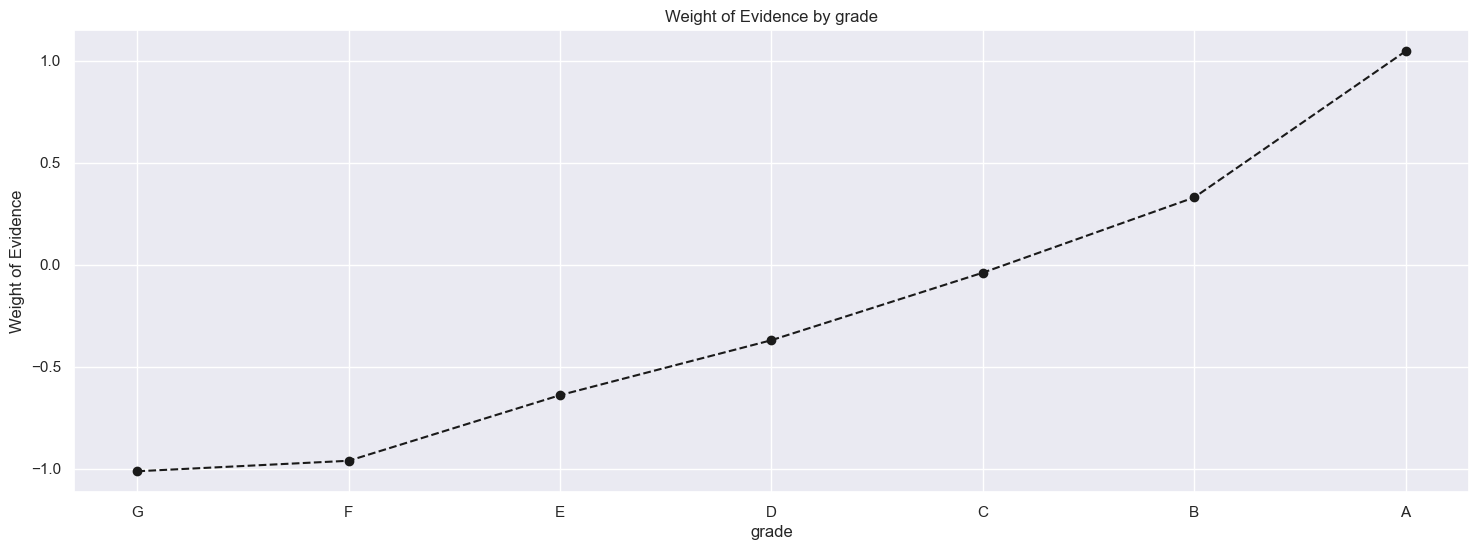

In [51]:
plot_by_woe(df_temp)

In [52]:
df_temp = woe_discrete(df_input_prepr,"home_ownership",df_target_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,NONE,40,0.850000,0.000107,34.0,6.0,0.000100,0.000176,-0.564927,inf
1,OTHER,137,0.854015,0.000367,117.0,20.0,0.000345,0.000588,-0.533086,inf
2,RENT,150599,0.894395,0.403720,134695.0,15904.0,0.397305,0.467682,-0.163086,inf
3,OWN,33295,0.911188,0.089256,30338.0,2957.0,0.089487,0.086955,0.028698,inf
4,MORTGAGE,188956,0.919987,0.506546,173837.0,15119.0,0.512760,0.444598,0.142638,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

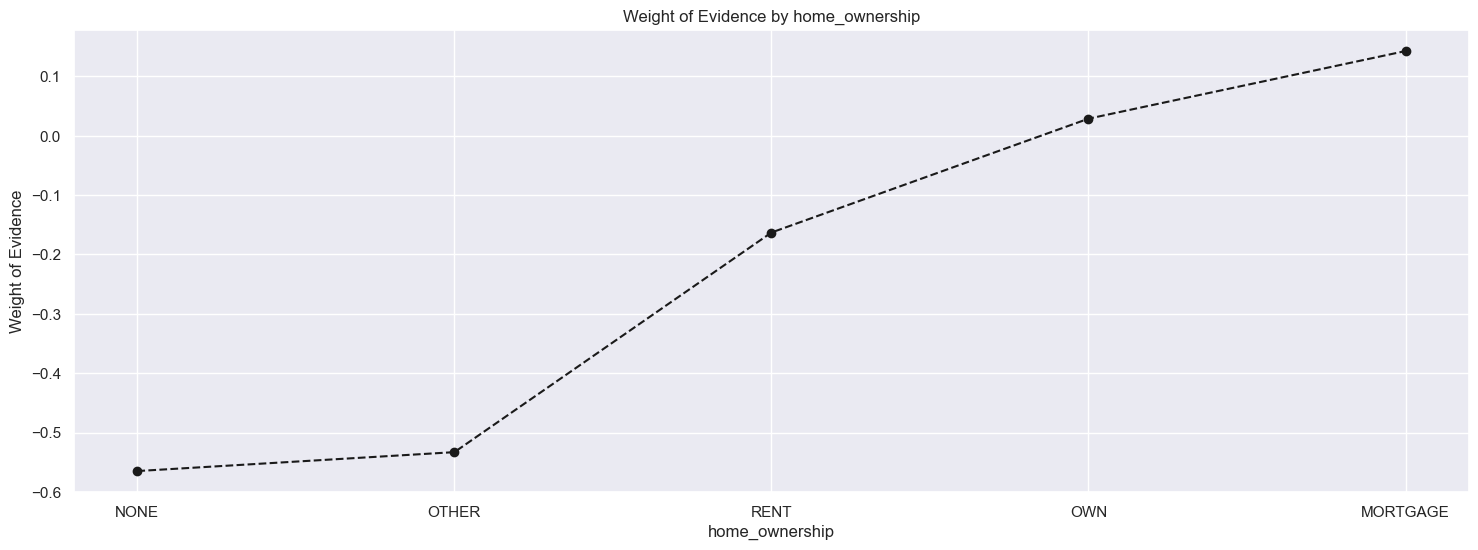

In [53]:
plot_by_woe(df_temp)

In [54]:
df_input_prepr["home_ownership:RENT_OTHER_NONE_ANY"] = sum([ df_input_prepr["home_ownership:RENT"],
                                                             df_input_prepr["home_ownership:OTHER"],
                                                             df_input_prepr["home_ownership:NONE"],
                                                             df_input_prepr["home_ownership:ANY"] ])

In [55]:
df_temp = woe_discrete(df_input_prepr,"addr_state",df_target_prepr)
df_temp


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,NE,13,0.692308,0.000035,9.0,4.0,0.000027,0.000118,-1.488598,inf
1,NV,5221,0.886995,0.013996,4631.0,590.0,0.013660,0.017350,-0.239122,inf
2,AL,4671,0.895311,0.012522,4182.0,489.0,0.012335,0.014380,-0.153346,inf
3,FL,25211,0.895799,0.067585,22584.0,2627.0,0.066615,0.077251,-0.148129,inf
4,NM,2075,0.898313,0.005563,1864.0,211.0,0.005498,0.006205,-0.120906,inf
5,HI,2001,0.898551,0.005364,1798.0,203.0,0.005303,0.005970,-0.118304,inf
6,CA,57199,0.902254,0.153337,51608.0,5591.0,0.152226,0.164412,-0.077009,inf
7,KY,3587,0.902704,0.009616,3238.0,349.0,0.009551,0.010263,-0.071889,inf
8,UT,2756,0.902758,0.007388,2488.0,268.0,0.007339,0.007881,-0.071281,inf
9,MO,6017,0.903274,0.016130,5435.0,582.0,0.016031,0.017115,-0.065384,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

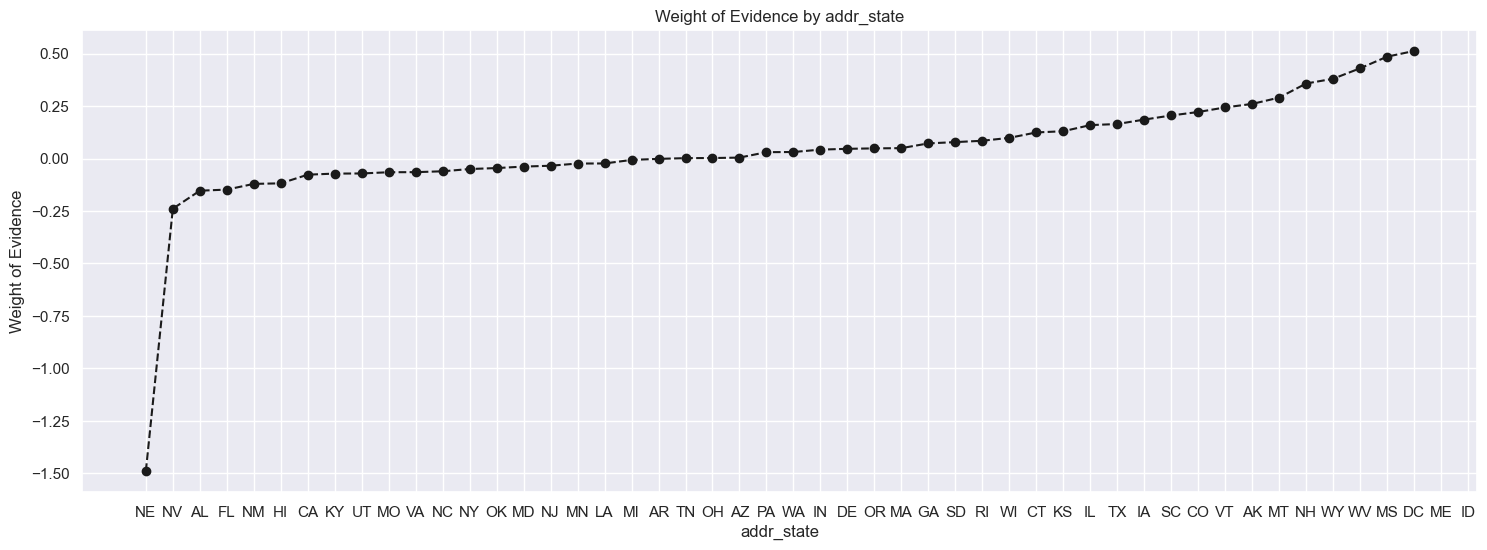

In [56]:
plot_by_woe(df_temp)

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

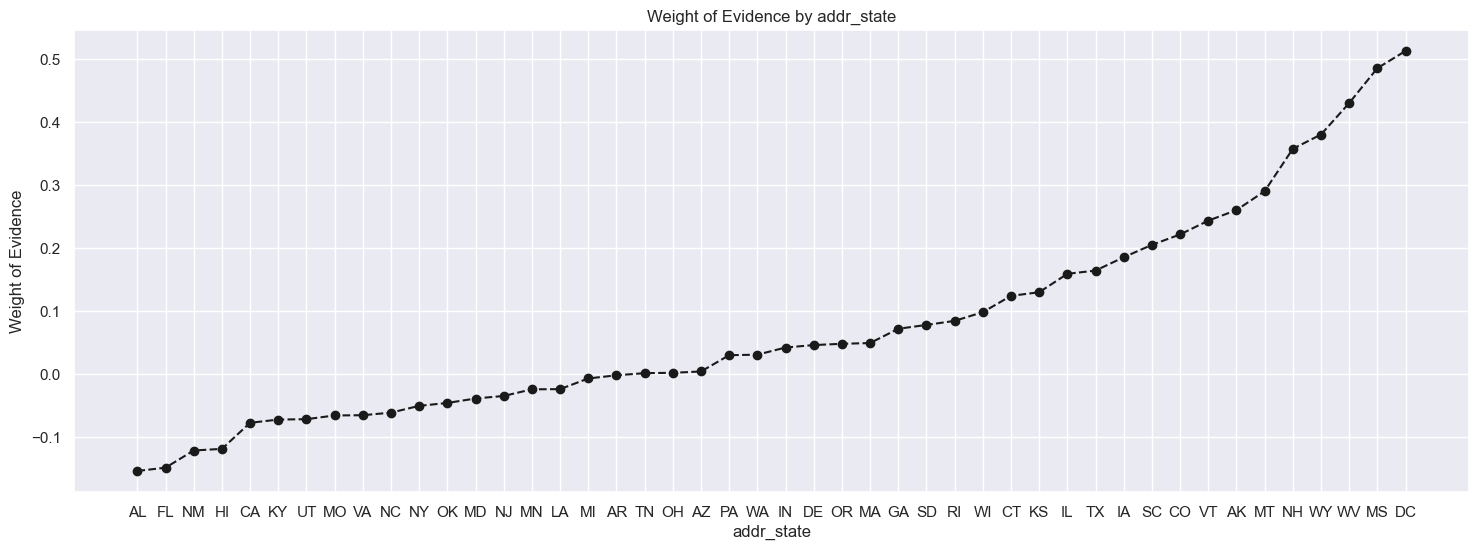

In [57]:
plot_by_woe(df_temp.iloc[2:-2, :])

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

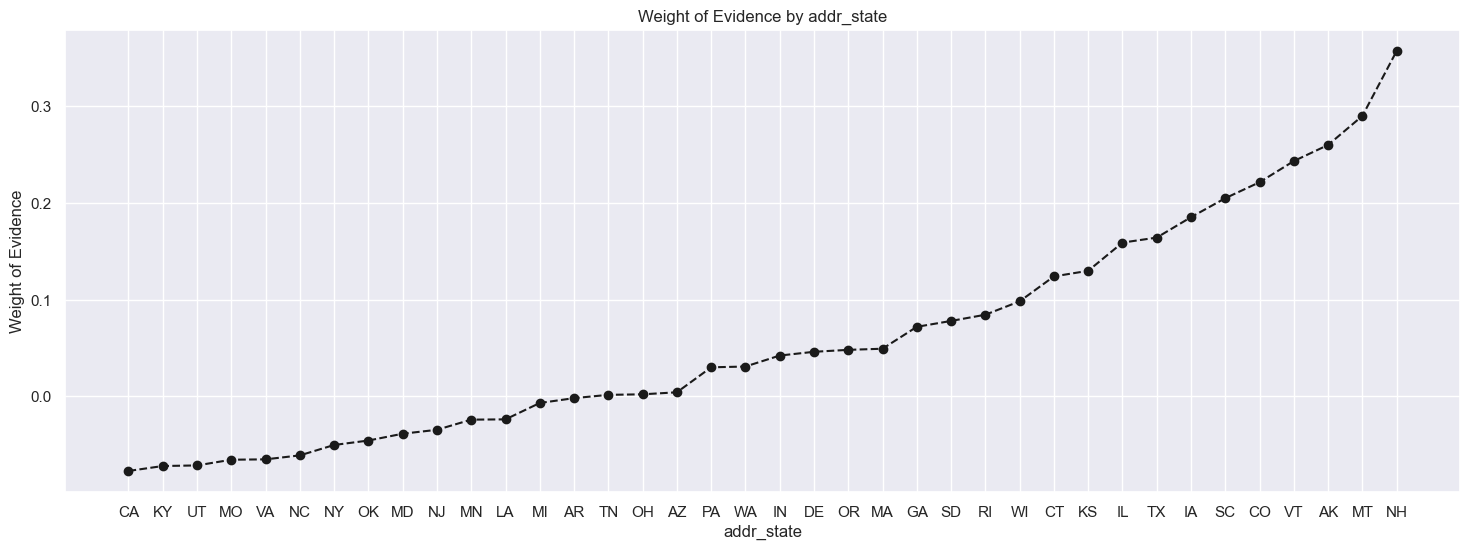

In [58]:
plot_by_woe(df_temp.iloc[6:-6, :])

In [59]:
if ['addr_state:ND'] in df_input_prepr.columns.values:
    pass
else:
    df_input_prepr['addr_state:ND'] = 0

In [60]:
df_input_prepr["addr_state:ND_NE_IA_NV_FL_HI_AL"] = sum([ df_input_prepr["addr_state:ND"],
                                                          df_input_prepr["addr_state:NE"],
                                                          df_input_prepr["addr_state:IA"],
                                                          df_input_prepr["addr_state:NV"],
                                                          df_input_prepr["addr_state:FL"],
                                                          df_input_prepr["addr_state:HI"],
                                                          df_input_prepr["addr_state:AL"]
                                                        ])

df_input_prepr["addr_state:NM_VA"] = sum([ df_input_prepr["addr_state:NM"],
                                df_input_prepr["addr_state:VA"] ])

df_input_prepr["addr_state:OK_TN_MO_LA_MD_NC"] = sum([ df_input_prepr["addr_state:OK"],
                                            df_input_prepr["addr_state:TN"],
                                            df_input_prepr["addr_state:MO"],
                                            df_input_prepr["addr_state:LA"],
                                            df_input_prepr["addr_state:MD"],
                                            df_input_prepr["addr_state:NC"]])


df_input_prepr["addr_state:UT_KY_AZ_NJ"] = sum([ df_input_prepr["addr_state:UT"],
                                      df_input_prepr["addr_state:KY"],
                                      df_input_prepr["addr_state:AZ"],
                                      df_input_prepr["addr_state:NJ"]
                                     ])

df_input_prepr["addr_state:AR_MI_PA_OH_MN"] = sum([ df_input_prepr["addr_state:AR"],
                                         df_input_prepr["addr_state:MI"],
                                         df_input_prepr["addr_state:PA"],
                                         df_input_prepr["addr_state:OH"],
                                         df_input_prepr["addr_state:MN"]
                                     ])

df_input_prepr["addr_state:RI_MA_DE_SD_IN"] = sum([ df_input_prepr["addr_state:RI"],
                                         df_input_prepr["addr_state:MA"],
                                         df_input_prepr["addr_state:DE"],
                                         df_input_prepr["addr_state:SD"],
                                         df_input_prepr["addr_state:IN"]
                                     ])



df_input_prepr["addr_state:GA_WA_OR"] = sum([ df_input_prepr["addr_state:GA"],
                                   df_input_prepr["addr_state:WA"],
                                   df_input_prepr["addr_state:OR"]
                                     ])

df_input_prepr["addr_state:WI_MT"] = sum([ df_input_prepr["addr_state:WI"],
                                df_input_prepr["addr_state:MT"]
                                ])

df_input_prepr["addr_state:IL_CT"] = sum([ df_input_prepr["addr_state:IL"],
                                df_input_prepr["addr_state:CT"]
                                ])


df_input_prepr["addr_state:KS_SC_CO_VT_AK_MS"] = sum([ df_input_prepr["addr_state:KS"],
                                            df_input_prepr["addr_state:SC"],
                                            df_input_prepr["addr_state:CO"],
                                            df_input_prepr["addr_state:VT"],
                                            df_input_prepr["addr_state:AK"],
                                            df_input_prepr["addr_state:MS"]
                                     ])

df_input_prepr["addr_state:WV_NH_WY_DC_ME_ID"] = sum([ df_input_prepr["addr_state:WV"],
                                            df_input_prepr["addr_state:NH"],
                                            df_input_prepr["addr_state:WY"],
                                            df_input_prepr["addr_state:DC"],
                                            df_input_prepr["addr_state:ME"],
                                            df_input_prepr["addr_state:ID"]
                                     ])


In [61]:
df_temp = woe_discrete(df_input_prepr,"verification_status",df_target_prepr)
df_temp


,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,Verified,134414,0.891031,0.360332,119767.0,14647.0,0.353272,0.430718,-0.198215,0.026031
1,Source Verified,120030,0.916179,0.321772,109969.0,10061.0,0.324371,0.295860,0.092004,0.026031
2,Not Verified,118584,0.921591,0.317896,109286.0,9298.0,0.322357,0.273422,0.164641,0.026031


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

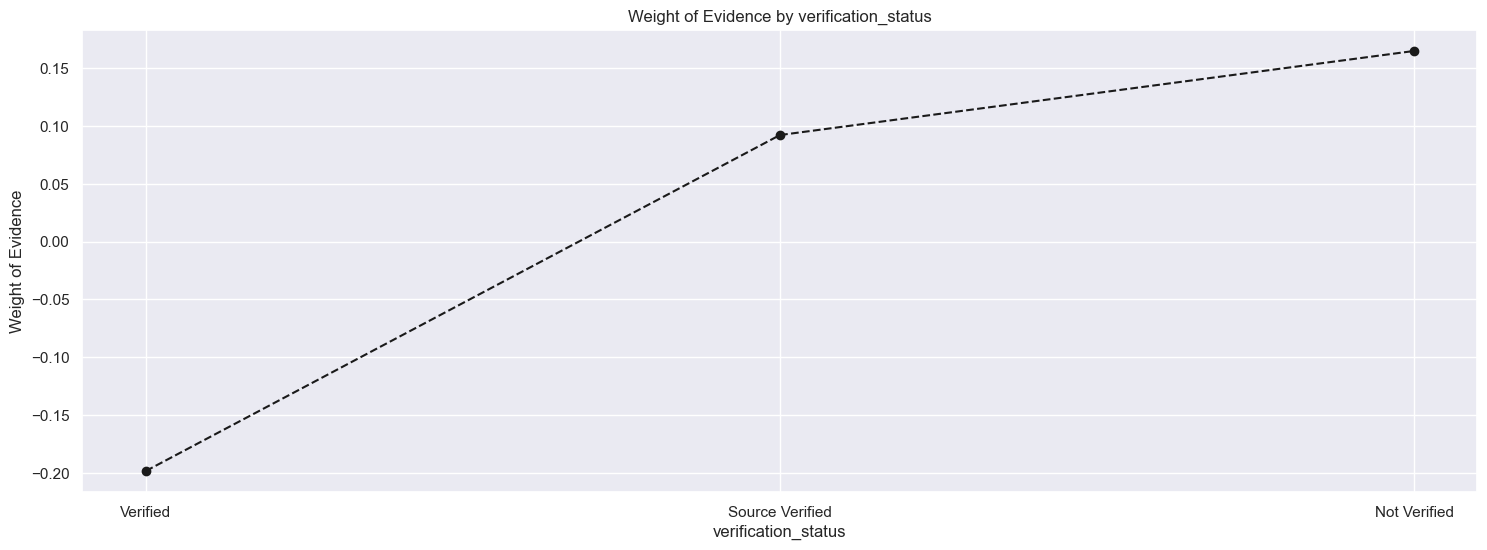

In [62]:
plot_by_woe(df_temp)

In [63]:
df_input_prepr["verification_status:Source_Ver_Verified"] = sum([ df_input_prepr["verification_status:Source Verified"],
                                                                  df_input_prepr["verification_status:Verified"]
                                                                ])

In [64]:
#df_input_prepr.columns

In [65]:
df_temp = woe_discrete(df_input_prepr,"purpose",df_target_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,small_business,5582,0.812970,0.014964,4538.0,1044.0,0.013386,0.030700,-0.830101,0.038226
1,moving,2392,0.862458,0.006412,2063.0,329.0,0.006085,0.009675,-0.463669,0.038226
2,educational,333,0.873874,0.000893,291.0,42.0,0.000858,0.001235,-0.363874,0.038226
3,renewable_energy,281,0.875445,0.000753,246.0,35.0,0.000726,0.001029,-0.349545,0.038226
4,other,18884,0.882970,0.050624,16674.0,2210.0,0.049183,0.064989,-0.278670,0.038226
5,house,1830,0.884153,0.004906,1618.0,212.0,0.004773,0.006234,-0.267168,0.038226
6,wedding,1887,0.888712,0.005059,1677.0,210.0,0.004947,0.006175,-0.221874,0.038226
7,medical,3684,0.888979,0.009876,3275.0,409.0,0.009660,0.012027,-0.219170,0.038226
8,vacation,1991,0.899046,0.005337,1790.0,201.0,0.005280,0.005911,-0.112862,0.038226
9,debt_consolidation,219183,0.905869,0.587578,198551.0,20632.0,0.585658,0.606716,-0.035325,0.038226


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

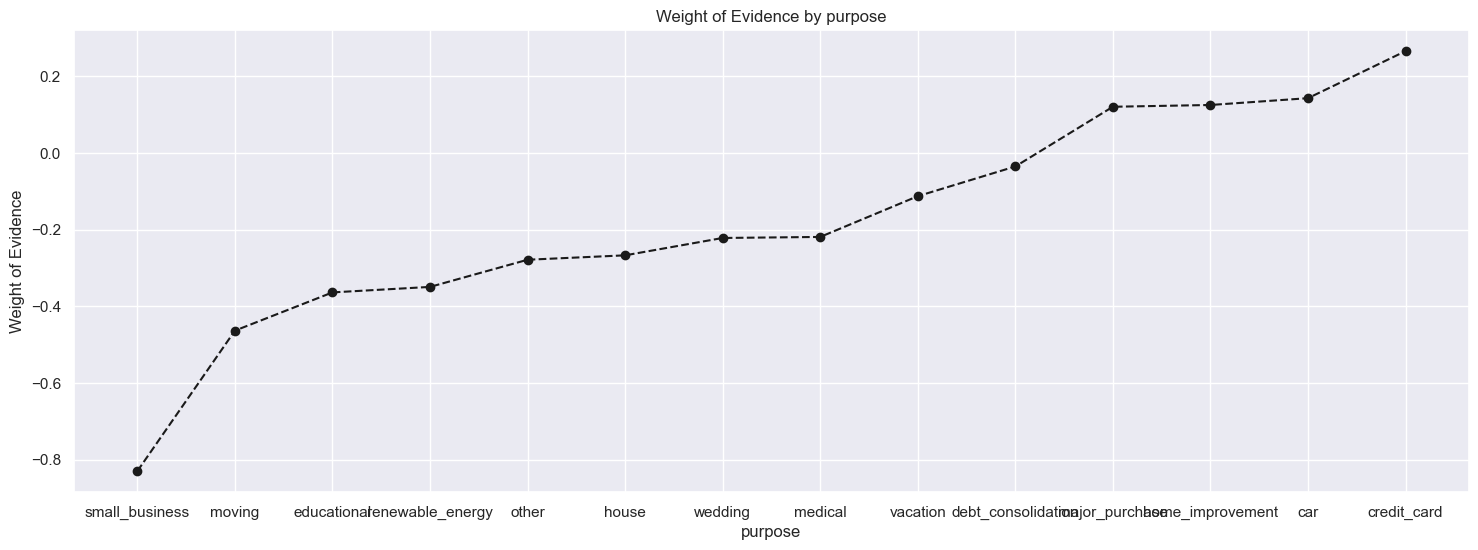

In [66]:
plot_by_woe(df_temp)

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

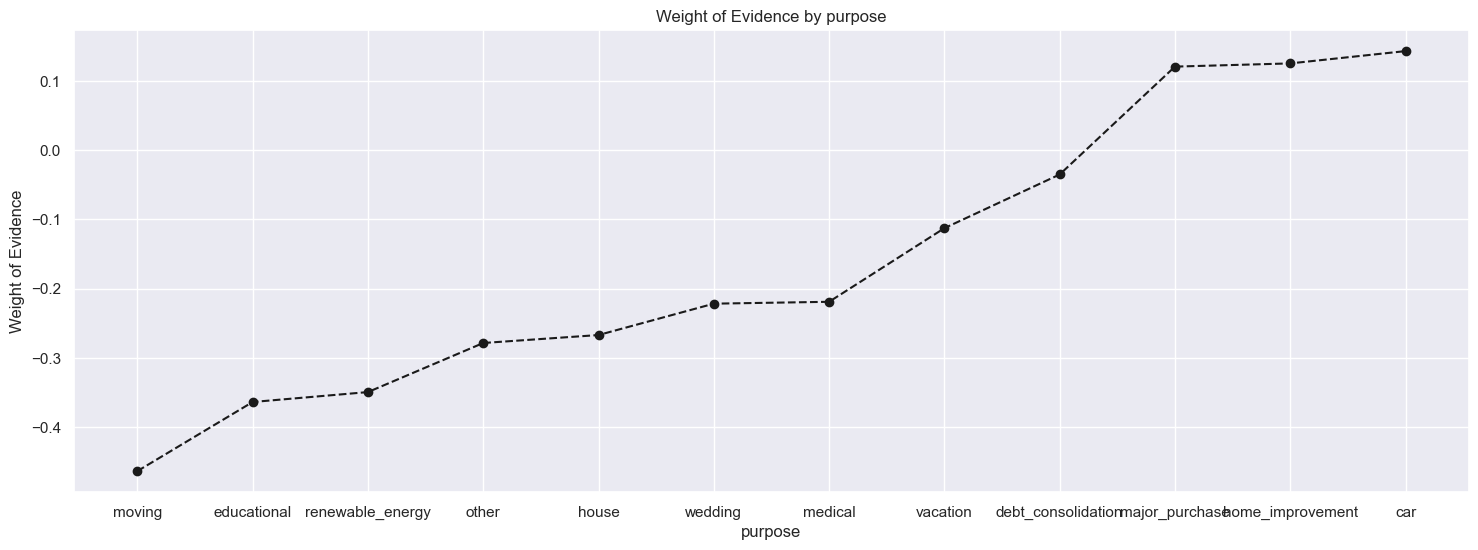

In [67]:
plot_by_woe(df_temp.iloc[1:-1,:])


In [68]:
df_input_prepr["purpose:educational_renewable_en_other"] = sum([ df_input_prepr["purpose:educational"],
                                                                 df_input_prepr["purpose:renewable_energy"],
                                                                 df_input_prepr["purpose:other"] 
                                                                ])
df_input_prepr["purpose:house_wedding_medical"] = sum([ df_input_prepr["purpose:house"],
                                                                 df_input_prepr["purpose:wedding"],
                                                                 df_input_prepr["purpose:medical"] 
                                                                ])
df_input_prepr["purpose:major_purchase_home_improvement"] = sum([ df_input_prepr["purpose:major_purchase"],
                                                                 df_input_prepr["purpose:home_improvement"]
                                                                ])


In [69]:

df_temp = woe_discrete(df_input_prepr,"initial_list_status",df_target_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,f,242514,0.896484,0.650123,217410.0,25104.0,0.641286,0.738223,-0.140770,0.044184
1,w,130514,0.931793,0.349877,121612.0,8902.0,0.358714,0.261777,0.315032,0.044184


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

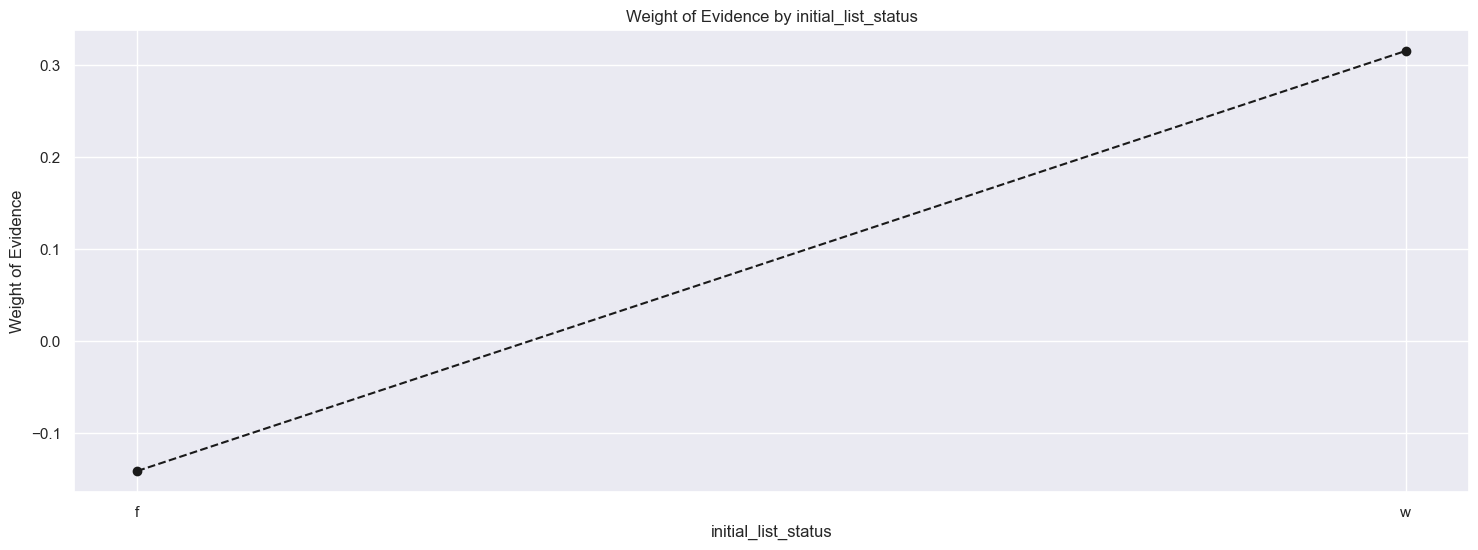

In [70]:
plot_by_woe(df_temp)

### Continuous Variables ###

In [71]:
def woe_continuous(df,continous_var_name,good_bad_var_df):
    df = pd.concat([df[continous_var_name],good_bad_var_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],"n_obs","prop_good"]
    df["prop_n_obs"] = df["n_obs"]/df["n_obs"].sum()
    df["n_good"] = df["prop_good"]*df["n_obs"]
    df["n_bad"] = (1-df["prop_good"])*df["n_obs"]
    df["prop_n_good"] = df["n_good"]/df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"]/df["n_bad"].sum()
    df["WoE"] = np.log( df["prop_n_good"] / df["prop_n_bad"] ) 
    #df = df.sort_values(["WoE"])
    #df = df.reset_index(drop = True)
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"] ) * df["WoE"]
    df["IV"] = df["IV"].sum()
    
    return df 

In [72]:
df_input_prepr["term_int"].unique()


array([' 36 ', ' 60 '], dtype=object)

In [73]:
df_temp = woe_continuous(df_input_prepr,"term_int",df_target_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,36,270419,0.918859,0.724929,248477.0,21942.0,0.732923,0.645239,0.127420,0.036067
1,60,102609,0.882427,0.275071,90545.0,12064.0,0.267077,0.354761,-0.283907,0.036067


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

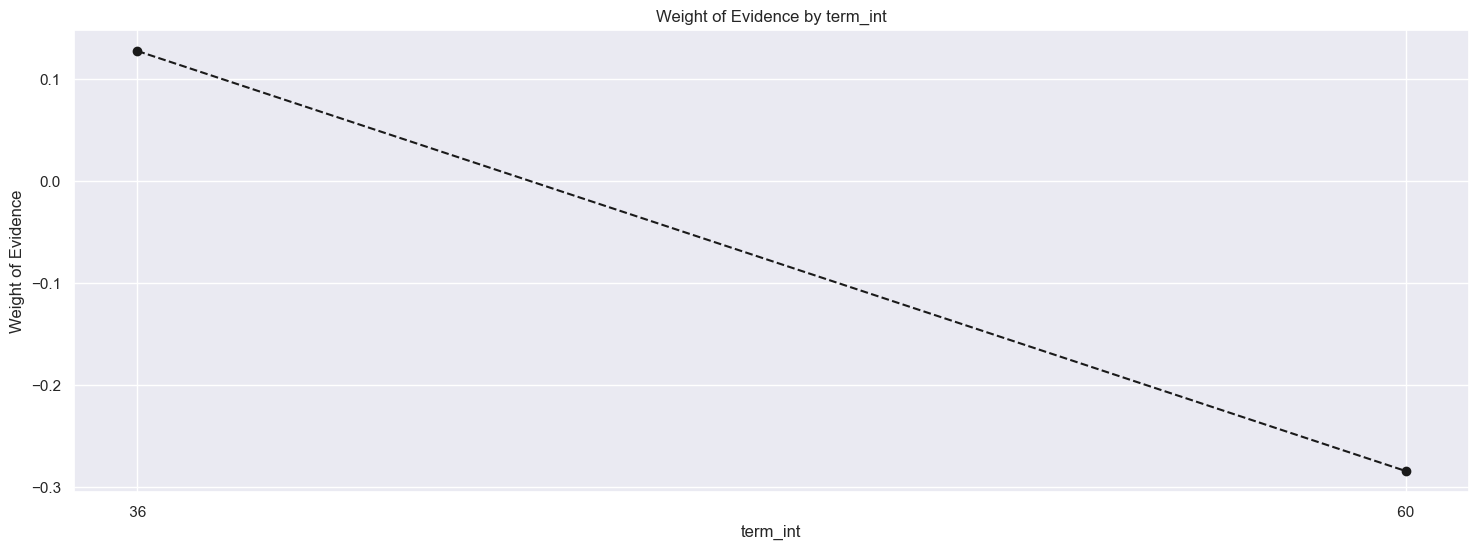

In [74]:
plot_by_woe(df_temp)

In [75]:
df_input_prepr["term_int:36"] = np.where(( df_input_prepr["term_int"] == 36 ),1,0)
df_input_prepr["term_int:60"] = np.where(( df_input_prepr["term_int"] == 60 ),1,0)

In [76]:
df_input_prepr["emp_length_int"].unique()

array([ 3,  6, 10,  7,  5,  0,  2,  9,  1,  8,  4], dtype=int64)

In [77]:
df_temp = woe_continuous(df_input_prepr,"emp_length_int",df_target_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0,45720,0.896960,0.122565,41009.0,4711.0,0.120963,0.138534,-0.135637,0.007267
1,1,23654,0.906781,0.063411,21449.0,2205.0,0.063267,0.064841,-0.024578,0.007267
2,2,33078,0.908822,0.088674,30062.0,3016.0,0.088673,0.088690,-0.000198,0.007267
3,3,29205,0.909194,0.078292,26553.0,2652.0,0.078322,0.077986,0.004301,0.007267
4,4,22468,0.906934,0.060231,20377.0,2091.0,0.060105,0.061489,-0.022764,0.007267
5,5,24602,0.901187,0.065952,22171.0,2431.0,0.065397,0.071487,-0.089046,0.007267
6,6,20887,0.902140,0.055993,18843.0,2044.0,0.055580,0.060107,-0.078295,0.007267
7,7,21049,0.904889,0.056427,19047.0,2002.0,0.056182,0.058872,-0.046765,0.007267
8,8,17853,0.908811,0.047860,16225.0,1628.0,0.047858,0.047874,-0.000327,0.007267
9,9,14267,0.907549,0.038246,12948.0,1319.0,0.038192,0.038787,-0.015461,0.007267


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

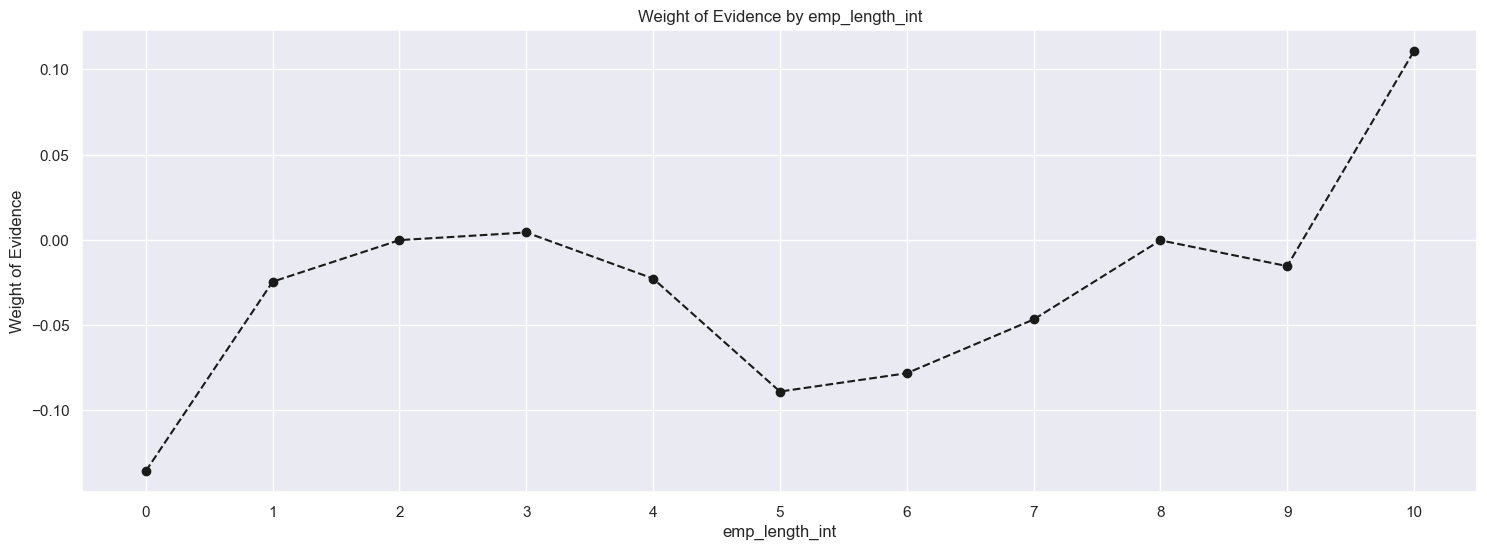

In [78]:
plot_by_woe(df_temp)

In [79]:
df_input_prepr["emp_length_int:0"] = np.where( df_input_prepr["emp_length_int"].isin([0]) ,1,0)
df_input_prepr["emp_length_int:1"] = np.where(df_input_prepr["emp_length_int"].isin([1]) ,1,0)
df_input_prepr["emp_length_int:2-4"] = np.where(df_input_prepr["emp_length_int"].isin(range(2,5)),1,0)
df_input_prepr["emp_length_int:5-6"] = np.where(df_input_prepr["emp_length_int"].isin(range(5,7)),1,0)
df_input_prepr["emp_length_int:7-9"] = np.where( df_input_prepr["emp_length_int"].isin(range(7,10)),1,0)
df_input_prepr["emp_length_int:10"] = np.where(df_input_prepr["emp_length_int"].isin([10]) ,1,0)                                              


In [80]:
##fine classing the variable into 50 categories
df_input_prepr["mnths_since_issue_d_factor"] = pd.cut(df_input_prepr["mnths_since_issue_d"],50)

df_temp = woe_continuous(df_input_prepr,"mnths_since_issue_d_factor",df_target_prepr)
df_temp

,mnths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(35.91, 37.8]",28170,0.967945,0.075517,27267.0,903.0,0.080428,0.026554,1.108182,inf
1,"(37.8, 39.6]",39636,0.953275,0.106255,37784.0,1852.0,0.111450,0.054461,0.716092,inf
2,"(39.6, 41.4]",38614,0.940980,0.103515,36335.0,2279.0,0.107176,0.067018,0.469517,inf
3,"(41.4, 43.2]",29038,0.931262,0.077844,27042.0,1996.0,0.079765,0.058696,0.306718,inf
4,"(43.2, 45.0]",28367,0.923996,0.076045,26211.0,2156.0,0.077314,0.063401,0.198396,inf
5,"(45.0, 46.8]",12165,0.917304,0.032611,11159.0,1006.0,0.032915,0.029583,0.106736,inf
6,"(46.8, 48.6]",24451,0.917508,0.065547,22434.0,2017.0,0.066173,0.059313,0.109438,inf
7,"(48.6, 50.4]",22969,0.904785,0.061574,20782.0,2187.0,0.061300,0.064312,-0.047972,inf
8,"(50.4, 52.2]",20640,0.894380,0.055331,18460.0,2180.0,0.054451,0.064106,-0.163247,inf
9,"(52.2, 54.0]",18312,0.880516,0.049090,16124.0,2188.0,0.047560,0.064342,-0.302207,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

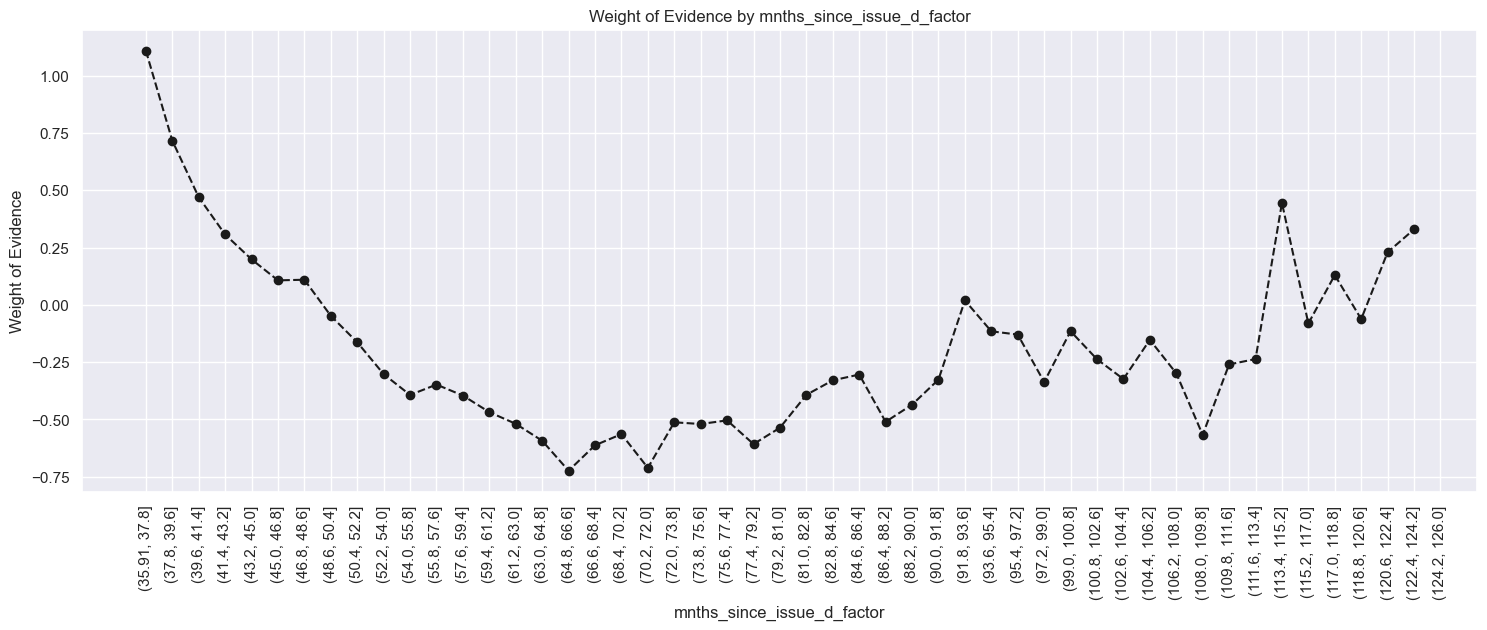

In [81]:
plot_by_woe(df_temp,90)

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

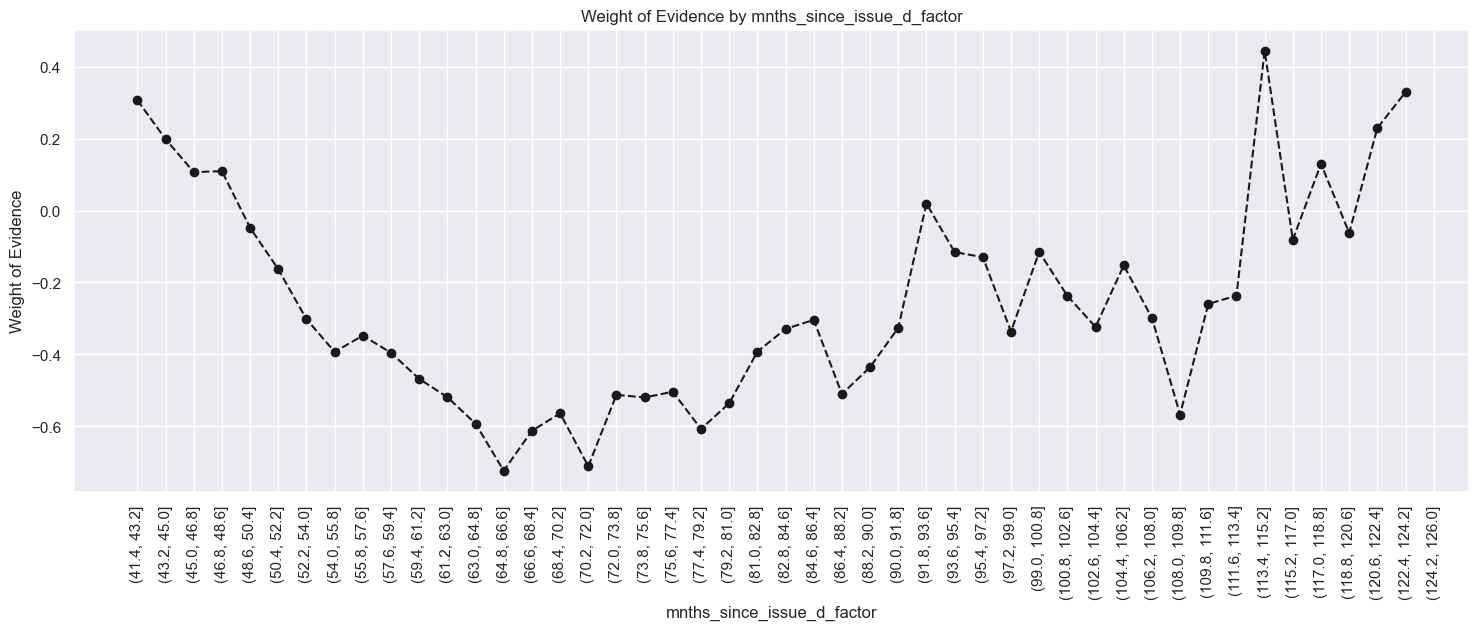

In [82]:
plot_by_woe(df_temp.loc[3:,:],90)

In [83]:
df_input_prepr["mnths_since_issue_d:<38"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(38)),1,0)
df_input_prepr["mnths_since_issue_d:38-39"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(38,40)),1,0)
df_input_prepr["mnths_since_issue_d:40-41"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(40,42)),1,0)
df_input_prepr["mnths_since_issue_d:42-48"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(42,49)),1,0)
df_input_prepr["mnths_since_issue_d:49-52"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(49,53)),1,0)
df_input_prepr["mnths_since_issue_d:53-64"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(53,65)),1,0)
df_input_prepr["mnths_since_issue_d:65-84"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(65,85)),1,0)
df_input_prepr["mnths_since_issue_d:>84"] = np.where(df_input_prepr["mnths_since_issue_d"].isin(range(85,int(df_input_prepr["mnths_since_issue_d"].max()))),1,0)

In [84]:
##fine classing the variable into 50 categories
df_input_prepr["int_rate_factor"] = pd.cut(df_input_prepr["int_rate"],50)

df_temp = woe_continuous(df_input_prepr,"int_rate_factor",df_target_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002227,0.000882,0.925992,0.347796
1,"(5.833, 6.246]",8459,0.982858,0.022677,8314.0,145.0,0.024523,0.004264,1.749434,0.347796
2,"(6.246, 6.658]",7826,0.975594,0.020980,7635.0,191.0,0.022521,0.005617,1.388697,0.347796
3,"(6.658, 7.071]",1816,0.974670,0.004868,1770.0,46.0,0.005221,0.001353,1.350565,0.347796
4,"(7.071, 7.484]",3143,0.981546,0.008426,3085.0,58.0,0.009100,0.001706,1.674336,0.347796
5,"(7.484, 7.897]",12581,0.967332,0.033727,12170.0,411.0,0.035897,0.012086,1.088608,0.347796
6,"(7.897, 8.31]",9687,0.954682,0.025969,9248.0,439.0,0.027278,0.012909,0.748135,0.347796
7,"(8.31, 8.722]",6594,0.976190,0.017677,6437.0,157.0,0.018987,0.004617,1.414044,0.347796
8,"(8.722, 9.135]",9539,0.942971,0.025572,8995.0,544.0,0.026532,0.015997,0.505947,0.347796
9,"(9.135, 9.548]",6681,0.975453,0.017910,6517.0,164.0,0.019223,0.004823,1.382775,0.347796


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

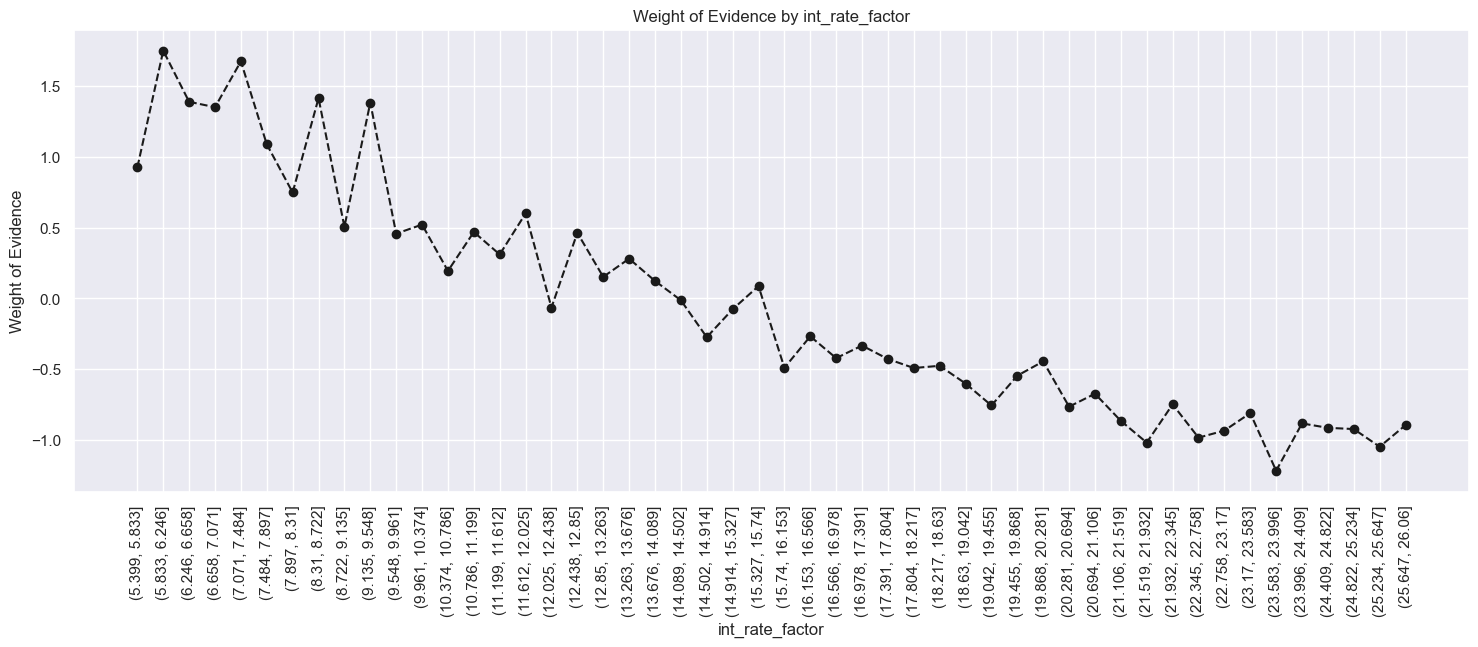

In [85]:
plot_by_woe(df_temp,90)

In [86]:
df_input_prepr["int_rate:<9.548"] = np.where(df_input_prepr["int_rate"] <= 9.548 ,1,0)
df_input_prepr["int_rate: 9.548-12.025"] = np.where((df_input_prepr["int_rate"] > 9.548) & (df_input_prepr["int_rate"] <= 12.025),1,0)
df_input_prepr["int_rate:12.025-15.327"] = np.where((df_input_prepr["int_rate"] > 12.025) & (df_input_prepr["int_rate"] <=  15.327),1,0)
df_input_prepr["int_rate:15.327-20.281"] = np.where((df_input_prepr["int_rate"] > 15.327) & (df_input_prepr["int_rate"] <=  20.281),1,0)
df_input_prepr["int_rate:>20"] = np.where((df_input_prepr["int_rate"] > 20.281),1,0)


In [87]:
##fine classing the variable into 50 categories
df_input_prepr["funded_amnt_factor"] = pd.cut(df_input_prepr["funded_amnt"],50)

df_temp = woe_continuous(df_input_prepr,"funded_amnt_factor",df_target_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(465.5, 1190.0]",1224,0.925654,0.003281,1133.0,91.0,0.003342,0.002676,0.222237,0.015964
1,"(1190.0, 1880.0]",3028,0.916777,0.008117,2776.0,252.0,0.008188,0.007410,0.099809,0.015964
2,"(1880.0, 2570.0]",6018,0.908441,0.016133,5467.0,551.0,0.016126,0.016203,-0.004778,0.015964
3,"(2570.0, 3260.0]",7248,0.903008,0.019430,6545.0,703.0,0.019306,0.020673,-0.068428,0.015964
4,"(3260.0, 3950.0]",4751,0.904652,0.012736,4298.0,453.0,0.012678,0.013321,-0.049515,0.015964
5,"(3950.0, 4640.0]",9023,0.906240,0.024189,8177.0,846.0,0.024119,0.024878,-0.030967,0.015964
6,"(4640.0, 5330.0]",15903,0.909577,0.042632,14465.0,1438.0,0.042667,0.042287,0.008951,0.015964
7,"(5330.0, 6020.0]",17236,0.920863,0.046206,15872.0,1364.0,0.046817,0.040111,0.154607,0.015964
8,"(6020.0, 6710.0]",6914,0.903095,0.018535,6244.0,670.0,0.018418,0.019702,-0.067429,0.015964
9,"(6710.0, 7400.0]",11806,0.915297,0.031649,10806.0,1000.0,0.031874,0.029407,0.080574,0.015964


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

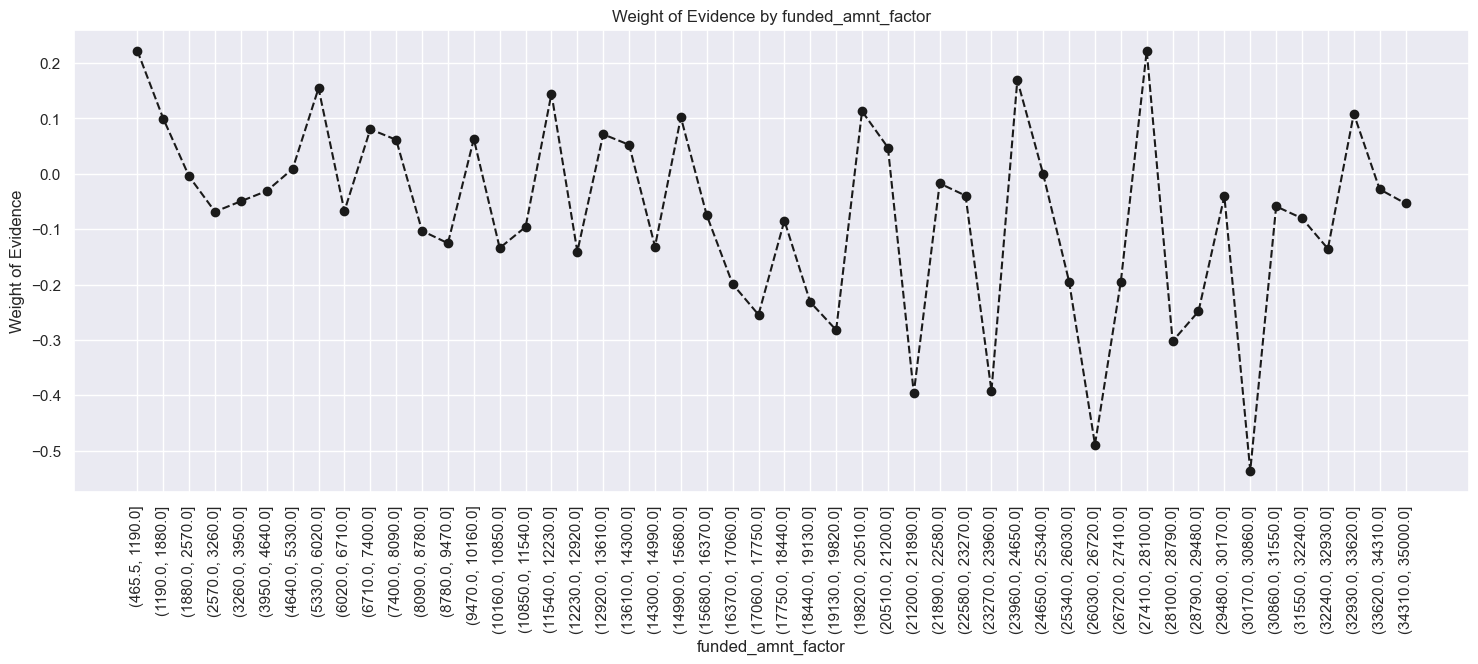

In [88]:
plot_by_woe(df_temp,90)

In [89]:
##In the above graph we cannot see a clear trend in the values for funded amount factor variable therefore, this will not be 
##considered for the model.

In [90]:

df_input_prepr["mnths_since_earliest_cr_line_factor"] = pd.cut(df_input_prepr["mnths_since_earliest_cr_line"],50)

df_temp = woe_continuous(df_input_prepr,"mnths_since_earliest_cr_line_factor",df_target_prepr)
df_temp

,mnths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.587, 11.74]",24,1.000000,0.000064,24.0,0.0,0.000071,0.000000,inf,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",722,0.932133,0.001936,673.0,49.0,0.001985,0.001441,0.320397,inf
7,"(82.18, 93.92]",1929,0.910835,0.005171,1757.0,172.0,0.005183,0.005058,0.024341,inf
8,"(93.92, 105.66]",2817,0.884274,0.007552,2491.0,326.0,0.007348,0.009587,-0.265986,inf
9,"(105.66, 117.4]",5092,0.896308,0.013650,4564.0,528.0,0.013462,0.015527,-0.142670,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

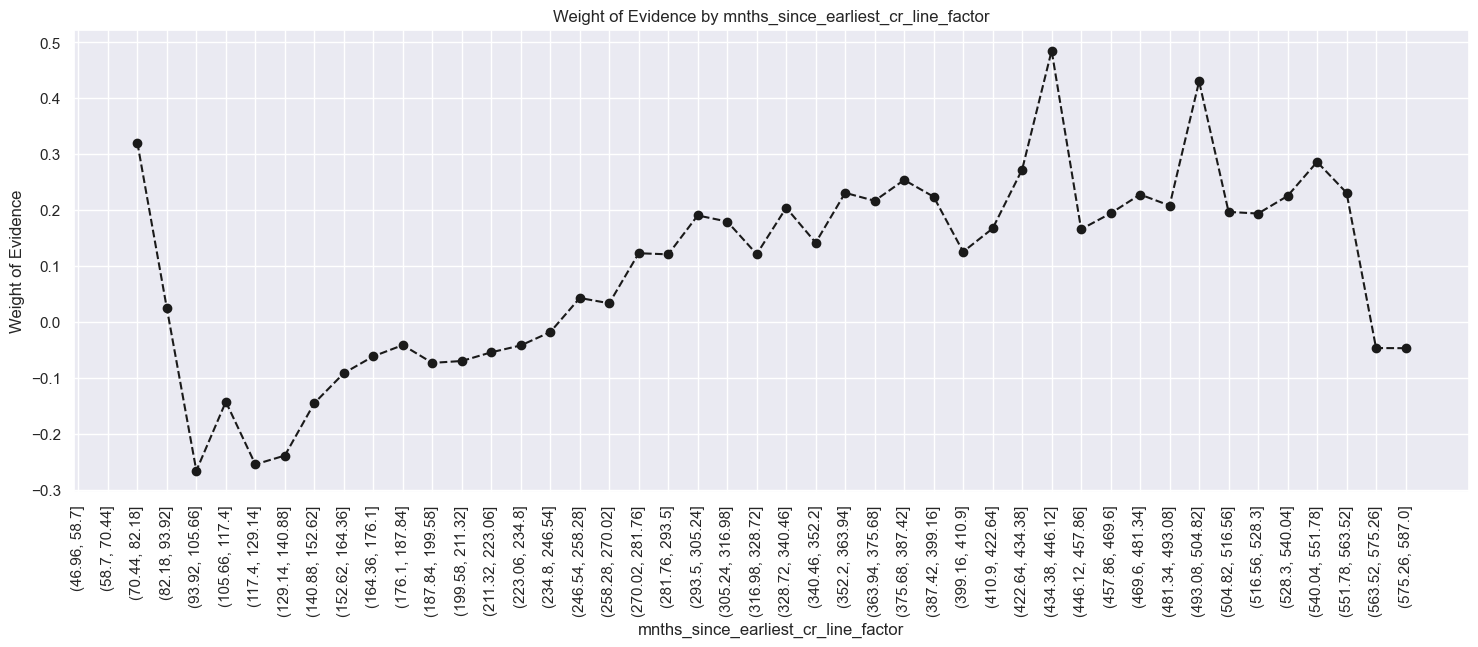

In [91]:
plot_by_woe(df_temp,90)

In [92]:
df_input_prepr["mnths_since_earliest_cr_line:<140"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(140)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:141-164"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(140,165)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:165-247"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(165,248)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:247-270"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(248,271)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:271-352"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(271,353)),1,0)
df_input_prepr["mnths_since_earliest_cr_line:>352"] = np.where(df_input_prepr["mnths_since_earliest_cr_line"].isin(range(353,int(df_input_prepr["mnths_since_earliest_cr_line"].max()))),1,0)


In [93]:

##fine classing the variable into 50 categories
df_input_prepr["installment_factor"] = pd.cut(df_input_prepr["installment"],50)

df_temp = woe_continuous(df_input_prepr,"installment_factor",df_target_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(14.276, 43.556]",1812,0.922185,0.004858,1671.0,141.0,0.004929,0.004146,0.172890,0.013294
1,"(43.556, 71.443]",4841,0.911175,0.012978,4411.0,430.0,0.013011,0.012645,0.028543,0.013294
2,"(71.443, 99.329]",6824,0.905627,0.018294,6180.0,644.0,0.018229,0.018938,-0.038153,0.013294
3,"(99.329, 127.216]",9138,0.904574,0.024497,8266.0,872.0,0.024382,0.025643,-0.050411,0.013294
4,"(127.216, 155.102]",10040,0.910359,0.026915,9140.0,900.0,0.026960,0.026466,0.018493,0.013294
5,"(155.102, 182.988]",16816,0.911453,0.045080,15327.0,1489.0,0.045209,0.043786,0.031983,0.013294
6,"(182.988, 210.875]",17216,0.919552,0.046152,15831.0,1385.0,0.046696,0.040728,0.136742,0.013294
7,"(210.875, 238.761]",15090,0.915507,0.040453,13815.0,1275.0,0.040750,0.037493,0.083281,0.013294
8,"(238.761, 266.648]",18842,0.919435,0.050511,17324.0,1518.0,0.051100,0.044639,0.135171,0.013294
9,"(266.648, 294.534]",20100,0.910647,0.053883,18304.0,1796.0,0.053991,0.052814,0.022030,0.013294


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

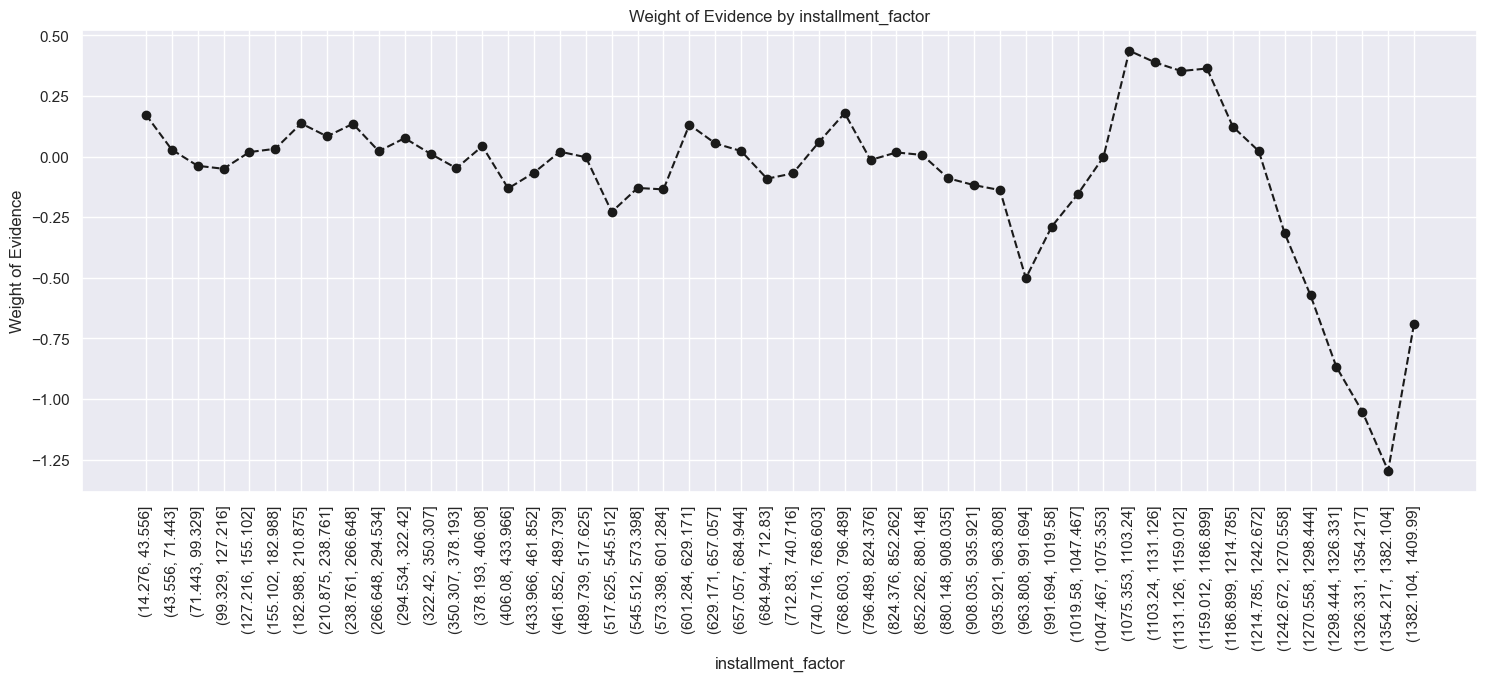

In [94]:
plot_by_woe(df_temp,90)

<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

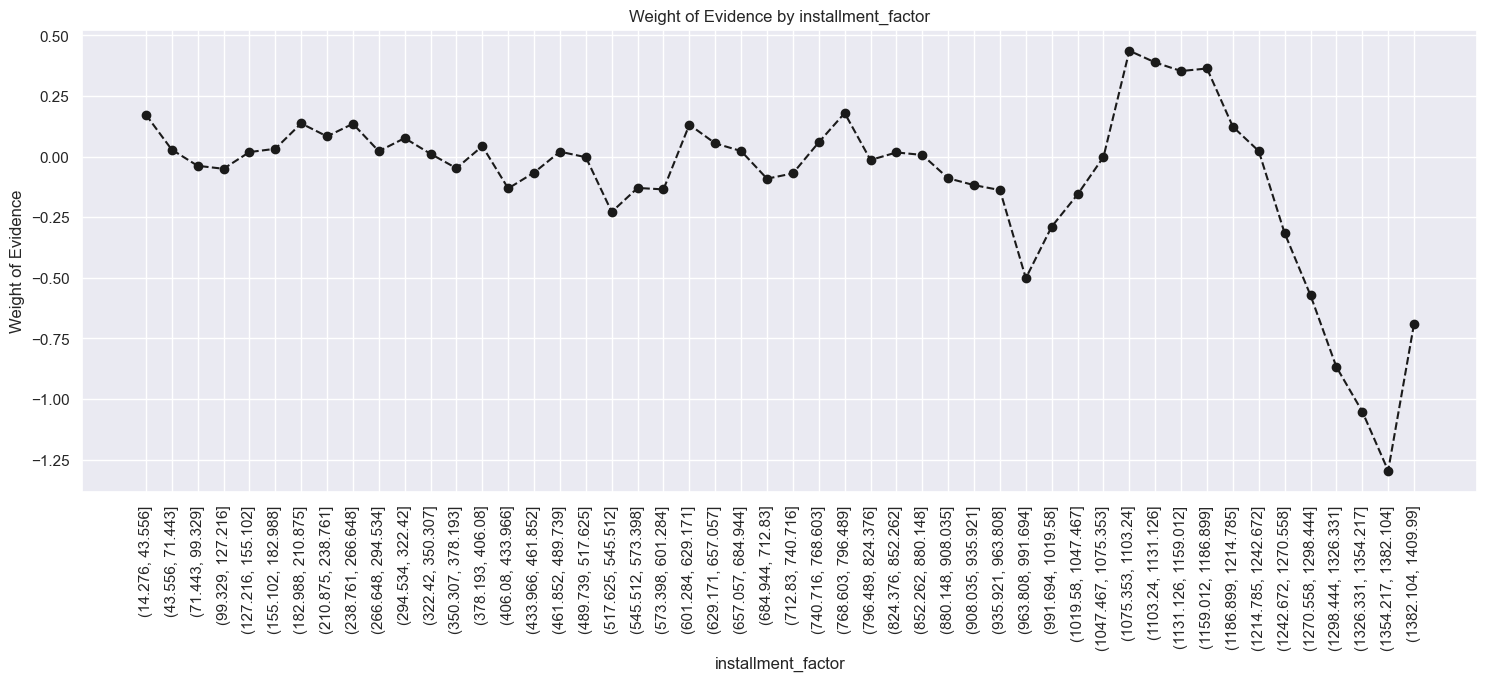

In [95]:
plot_by_woe(df_temp,90)

In [96]:
df_input_prepr["delinq_2yrs:0"] = np.where(df_input_prepr["delinq_2yrs"] == 0 ,1,0)
df_input_prepr["delinq_2yrs:1-3"] = np.where((df_input_prepr["delinq_2yrs"] >= 1) & (df_input_prepr["delinq_2yrs"] <= 3),1,0)
df_input_prepr["delinq_2yrs:>=4"] = np.where((df_input_prepr["delinq_2yrs"] >= 4),1,0)


In [97]:
df_temp = woe_continuous(df_input_prepr,"inq_last_6mths",df_target_prepr)
df_temp


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,193232,0.923920,0.518009,178531.0,14701.0,0.526606,0.432306,0.197319,inf
1,1.0,104163,0.902902,0.279236,94049.0,10114.0,0.277413,0.297418,-0.069633,inf
2,2.0,46214,0.882893,0.123889,40802.0,5412.0,0.120352,0.159148,-0.279416,inf
3,3.0,20040,0.860180,0.053723,17238.0,2802.0,0.050846,0.082397,-0.482745,inf
4,4.0,5810,0.892599,0.015575,5186.0,624.0,0.015297,0.018350,-0.181960,inf
5,5.0,2217,0.894903,0.005943,1984.0,233.0,0.005852,0.006852,-0.157696,inf
6,6.0,977,0.888434,0.002619,868.0,109.0,0.002560,0.003205,-0.224684,inf
7,7.0,159,0.949686,0.000426,151.0,8.0,0.000445,0.000235,0.638310,inf
8,8.0,101,0.970297,0.000271,98.0,3.0,0.000289,0.000088,1.186827,inf
9,9.0,43,1.000000,0.000115,43.0,0.0,0.000127,0.000000,inf,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

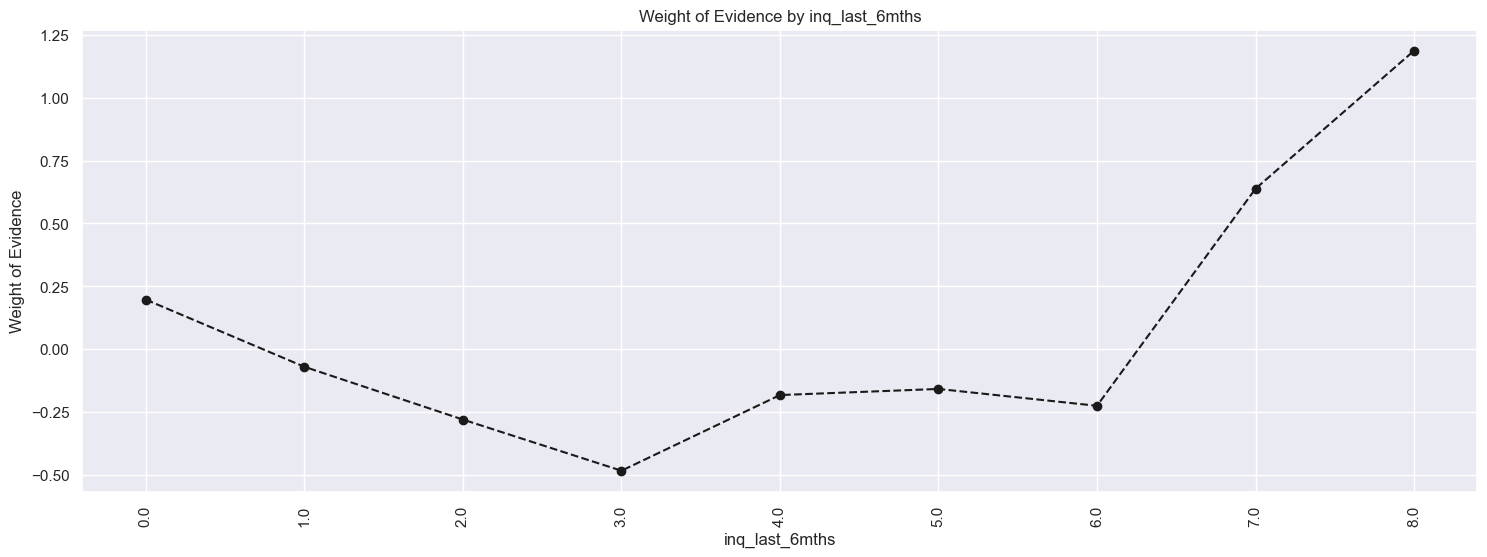

In [98]:
plot_by_woe(df_temp,90)

In [99]:
df_input_prepr["inq_last_6mths:0"] = np.where(df_input_prepr["inq_last_6mths"] == 0 ,1,0)
df_input_prepr["inq_last_6mths:1-2"] = np.where((df_input_prepr["inq_last_6mths"] >= 1) & (df_input_prepr["inq_last_6mths"] <= 2),1,0)
df_input_prepr["inq_last_6mths:3-6"] = np.where((df_input_prepr["inq_last_6mths"] >= 3) & (df_input_prepr["inq_last_6mths"] <= 6),1,0)
df_input_prepr["inq_last_6mths:>6"] = np.where((df_input_prepr["inq_last_6mths"] > 6),1,0)

In [100]:
df_temp = woe_continuous(df_input_prepr,"open_acc",df_target_prepr)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,29,0.896552,0.000078,26.0,3.0,0.000077,0.000088,-0.140044,inf
1,1.0,110,0.936364,0.000295,103.0,7.0,0.000304,0.000206,0.389291,inf
2,2.0,1456,0.869505,0.003903,1266.0,190.0,0.003734,0.005587,-0.402934,inf
3,3.0,4378,0.890818,0.011736,3900.0,478.0,0.011504,0.014056,-0.200407,inf
4,4.0,10028,0.904467,0.026883,9070.0,958.0,0.026753,0.028171,-0.051648,inf
5,5.0,17141,0.907240,0.045951,15551.0,1590.0,0.045870,0.046756,-0.019137,inf
6,6.0,24621,0.908777,0.066003,22375.0,2246.0,0.065999,0.066047,-0.000735,inf
7,7.0,30169,0.909211,0.080876,27430.0,2739.0,0.080909,0.080545,0.004516,inf
8,8.0,33579,0.907710,0.090017,30480.0,3099.0,0.089906,0.091131,-0.013537,inf
9,9.0,35251,0.906698,0.094500,31962.0,3289.0,0.094277,0.096718,-0.025564,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

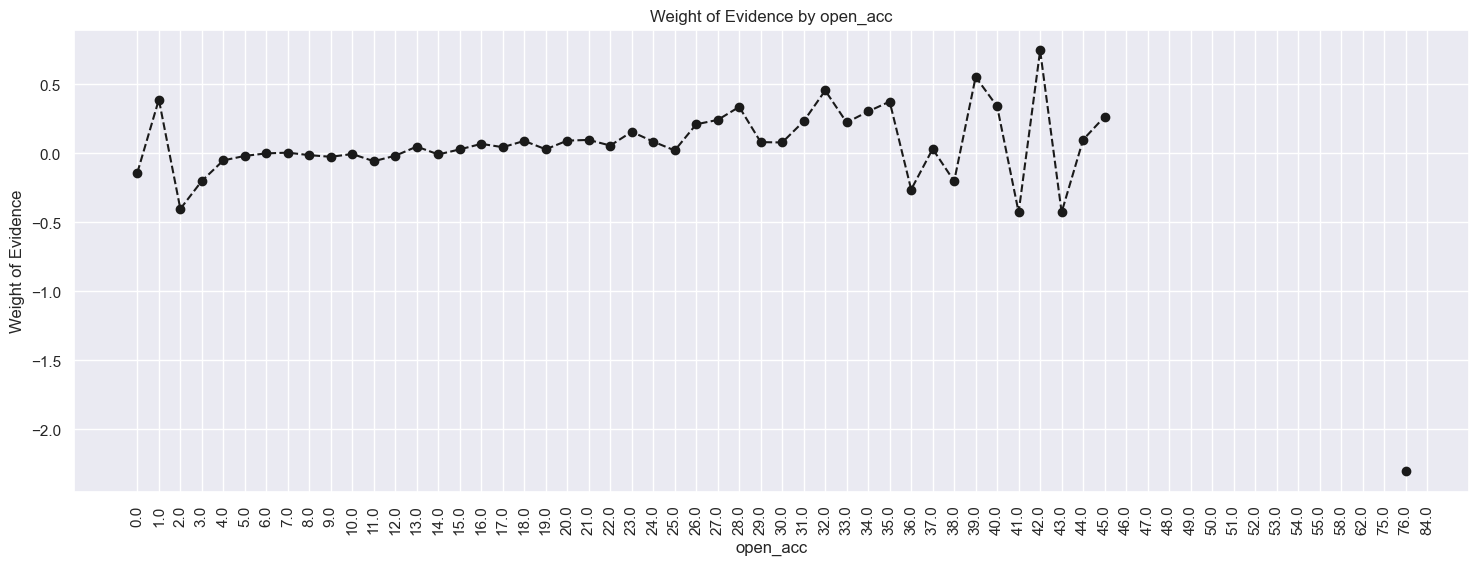

In [101]:
plot_by_woe(df_temp,90)

In [102]:
df_input_prepr["open_acc:0"] = np.where(df_input_prepr["open_acc"] == 0 ,1,0)
df_input_prepr["open_acc:1-3"] = np.where((df_input_prepr["open_acc"] >= 1) & (df_input_prepr["open_acc"] <= 3),1,0)
df_input_prepr["open_acc:4-12"] = np.where((df_input_prepr["open_acc"] >= 4) & (df_input_prepr["open_acc"] <= 12),1,0)
df_input_prepr["open_acc:13-17"] = np.where((df_input_prepr["open_acc"] >= 13) & (df_input_prepr["open_acc"] <= 17),1,0)
df_input_prepr["open_acc:18-22"] = np.where((df_input_prepr["open_acc"] >= 18) & (df_input_prepr["open_acc"] <= 22),1,0)
df_input_prepr["open_acc:23-25"] = np.where((df_input_prepr["open_acc"] >= 23) & (df_input_prepr["open_acc"] <= 25),1,0)
df_input_prepr["open_acc:26-30"] = np.where((df_input_prepr["open_acc"] >= 26) & (df_input_prepr["open_acc"] <= 30),1,0)
df_input_prepr["open_acc:>30"] = np.where((df_input_prepr["open_acc"] > 30),1,0)

In [103]:
df_temp = woe_continuous(df_input_prepr,"pub_rec",df_target_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,323999,0.907521,0.868565,294036.0,29963.0,0.867307,0.881109,-0.015789,inf
1,1.0,42381,0.915575,0.113613,38803.0,3578.0,0.114456,0.105217,0.084166,inf
2,2.0,4527,0.924232,0.012136,4184.0,343.0,0.012341,0.010086,0.201765,inf
3,3.0,1280,0.944531,0.003431,1209.0,71.0,0.003566,0.002088,0.535341,inf
4,4.0,408,0.941176,0.001094,384.0,24.0,0.001133,0.000706,0.473061,inf
5,5.0,203,0.926108,0.000544,188.0,15.0,0.000555,0.000441,0.228864,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000322,0.000235,0.312378,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000136,0.000059,0.835966,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000071,0.000000,inf,inf
9,9.0,14,0.857143,0.000038,12.0,2.0,0.000035,0.000059,-0.507769,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

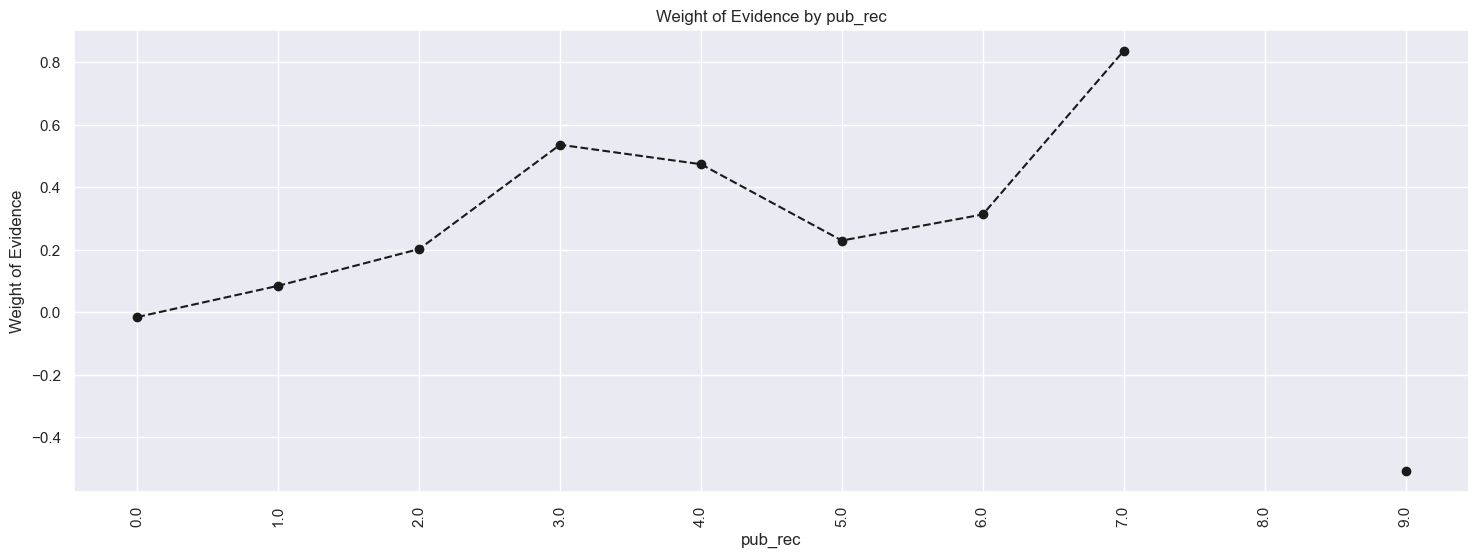

In [104]:
plot_by_woe(df_temp,90)

In [105]:
df_input_prepr["pub_rec:0"]   = np.where(df_input_prepr["pub_rec"] == 0 ,1,0)
df_input_prepr["pub_rec:1-2"] = np.where((df_input_prepr["pub_rec"] >= 1) & (df_input_prepr["pub_rec"] <= 2),1,0)
df_input_prepr["pub_rec:3-4"] = np.where((df_input_prepr["pub_rec"] >= 3) & (df_input_prepr["pub_rec"] <= 4),1,0)
df_input_prepr["pub_rec:>=5"] = np.where((df_input_prepr["pub_rec"] >=5),1,0)

In [106]:
##fine classing the variable into 50 categories
df_input_prepr["total_acc_factor"] = pd.cut(df_input_prepr["total_acc"],50)

df_temp = woe_continuous(df_input_prepr,"total_acc_factor",df_target_prepr)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(-0.15, 3.0]",459,0.880174,0.001230,404.0,55.0,0.001192,0.001617,-0.305446,inf
1,"(3.0, 6.0]",6004,0.882745,0.016095,5300.0,704.0,0.015633,0.020702,-0.280844,inf
2,"(6.0, 9.0]",15047,0.893068,0.040337,13438.0,1609.0,0.039638,0.047315,-0.177054,inf
3,"(9.0, 12.0]",25169,0.899003,0.067472,22627.0,2542.0,0.066742,0.074752,-0.113335,inf
4,"(12.0, 15.0]",33651,0.900776,0.090210,30312.0,3339.0,0.089410,0.098189,-0.093656,inf
5,"(15.0, 18.0]",38711,0.905712,0.103775,35061.0,3650.0,0.103418,0.107334,-0.037166,inf
6,"(18.0, 21.0]",40599,0.903791,0.108836,36693.0,3906.0,0.108232,0.114862,-0.059456,inf
7,"(21.0, 24.0]",40163,0.909095,0.107668,36512.0,3651.0,0.107698,0.107363,0.003112,inf
8,"(24.0, 27.0]",36286,0.913603,0.097274,33151.0,3135.0,0.097784,0.092190,0.058916,inf
9,"(27.0, 30.0]",31775,0.914933,0.085181,29072.0,2703.0,0.085753,0.079486,0.075885,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

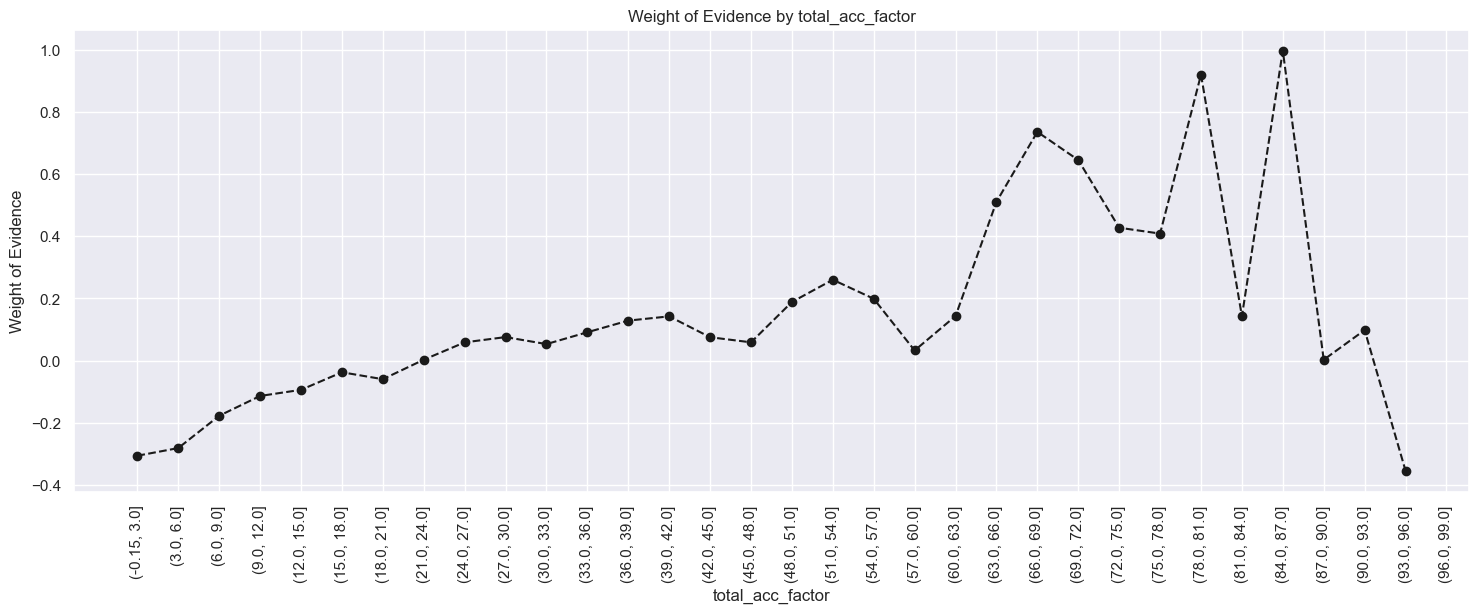

In [107]:
plot_by_woe(df_temp,90)

In [108]:
df_input_prepr["total_acc:<=27"]   = np.where(df_input_prepr["total_acc"] <=27 ,1,0)
df_input_prepr["total_acc:28 - 51"] = np.where((df_input_prepr["total_acc"] >= 28) & (df_input_prepr["total_acc"] <= 51),1,0)
df_input_prepr["total_acc:>=52"] = np.where((df_input_prepr["total_acc"] >=52),1,0)

In [109]:
df_temp = woe_continuous(df_input_prepr,"acc_now_delinq",df_target_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,0.0,371682,0.908793,0.996392,337782.0,33900.0,0.996342,0.996883,-0.000542,inf
1,1.0,1263,0.920823,0.003386,1163.0,100.0,0.003430,0.002941,0.154060,inf
2,2.0,70,0.942857,0.000188,66.0,4.0,0.000195,0.000118,0.503832,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000029,-0.507769,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000029,-2.299528,inf


<function __main__.plot_by_woe(df_WoE, rotation_of_x_ax_lbl=0)>

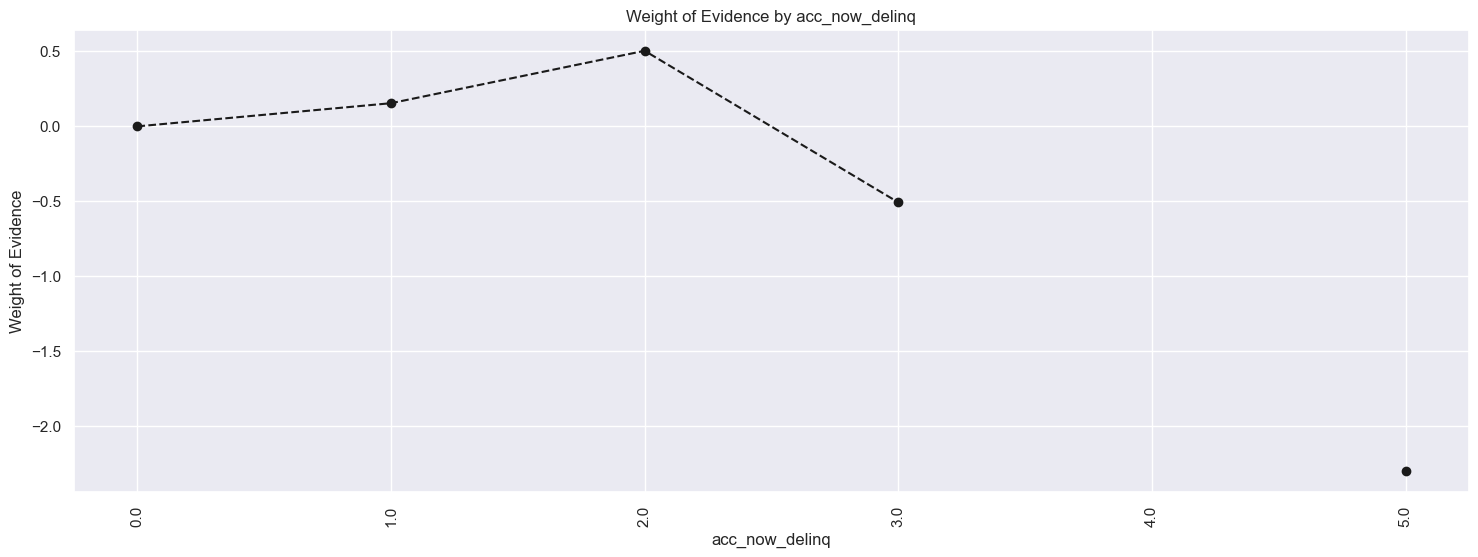

In [110]:
plot_by_woe(df_temp,90)

In [111]:
df_input_prepr["acc_now_delinq:0"]   = np.where((df_input_prepr["acc_now_delinq"]) == 0 ,1,0)
df_input_prepr["acc_now_delinq:>=1"] = np.where((df_input_prepr["acc_now_delinq"] >=1),1,0)


In [112]:
df_input_prepr["annual_inc"] = df_input_prepr["annual_inc"].fillna(df_input_prepr["annual_inc"].mean())

In [113]:
##fine classing the variable into 50 categories
df_input_prepr["annual_inc_factor"] = pd.cut(df_input_prepr["annual_inc"],100)

df_temp = woe_continuous(df_input_prepr,"annual_inc_factor",df_target_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(-5243.882, 73294.82]",231445,0.895664,0.620449,207297.0,24148.0,0.611456,0.710110,-0.149577,inf
1,"(73294.82, 144693.64]",120459,0.928415,0.322922,111836.0,8623.0,0.329878,0.253573,0.263072,inf
2,"(144693.64, 216092.46]",15885,0.940258,0.042584,14936.0,949.0,0.044056,0.027907,0.456593,inf
3,"(216092.46, 287491.28]",3119,0.941969,0.008361,2938.0,181.0,0.008666,0.005323,0.487459,inf
4,"(287491.28, 358890.1]",1117,0.952551,0.002994,1064.0,53.0,0.003138,0.001559,0.699971,inf
5,"(358890.1, 430288.92]",408,0.955882,0.001094,390.0,18.0,0.001150,0.000529,0.776247,inf
6,"(430288.92, 501687.74]",245,0.955102,0.000657,234.0,11.0,0.000690,0.000323,0.757898,inf
7,"(501687.74, 573086.56]",87,0.919540,0.000233,80.0,7.0,0.000236,0.000206,0.136588,inf
8,"(573086.56, 644485.38]",61,0.918033,0.000164,56.0,5.0,0.000165,0.000147,0.116386,inf
9,"(644485.38, 715884.2]",51,0.921569,0.000137,47.0,4.0,0.000139,0.000118,0.164325,inf


In [114]:
Data Exploration

SyntaxError: invalid syntax (4001574206.py, line 1)

In [ ]:
Data Visualization

In [ ]:
Model 

In [ ]:
Prediction

In [ ]:
Validation